In [1]:
import dipy.segment.bundles as dsb
import nibabel as nib
import numpy as np
from dipy.io.streamline import load_tractogram, save_tractogram
import nibabel as nib
import networkx as nx
import matplotlib.pyplot as plt
import robustReebConstruction_avg_loc_qb as rc
import os
import pickle
import networkx as nx
import visualization as vis
from mpl_toolkits.mplot3d import Axes3D
def graph_vis(G, node_loc, streamlines):
    # 3d spring layout
    pos = node_loc
    # Extract node and edge positions from the layout
    node_xyz = np.array([pos[v] for v in sorted(G)])
    edge_xyz = np.array([(pos[u], pos[v]) for u, v in G.edges()])

    # Create the 3D figure
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot the nodes - alpha is scaled by "depth" automatically
    ax.scatter(*node_xyz.T, s=100, ec="w",label = None)
    for i in range(len(streamlines)):
        xdata = []
        ydata = []
        zdata = []
        for j in streamlines[i]:
            xdata.append(j[0])
            ydata.append(j[1])
            zdata.append(j[2])
        ax.plot3D(xdata,ydata,zdata,color= '#bfbfbf', lw = 2);
    # Plot the nodes
    ax.scatter(*node_xyz.T, s=400, ec="w", color = 'r', zorder=100)
    edge_labels = nx.get_edge_attributes(G, "weight")
    # Plot the edges
    weight_labels = list(edge_labels.values())
    count = 0
    for vizedge in edge_xyz:
        wt = weight_labels[count]*5
        if wt == 10:
            ax.plot(*vizedge.T, color='g',
                    lw = wt,
                    zorder = 50,
                   label = str(weight_labels[count]))
        else:
            ax.plot(*vizedge.T, color='#000000',
                    lw = wt,
                    zorder = 50,
                   label = str(weight_labels[count]))
        count+=1


    def _format_axes(ax):
        """Visualization options for the 3D axes."""
        # Turn gridlines off
        ax.grid(False)
        # Suppress tick labels
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        # Set axes labels
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")


    _format_axes(ax)
    fig.tight_layout()
    plt.axis("off")
    plt.legend()
#read streamlines and create combined_streamlines
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '0798q', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# sub_list = sub_list[:3]
# sub_list = ['', '1808u', '1043f', '0001a', '4662a', '1142k', '', '2027j', '3978i', '1145h', '3058s', '2211h', '', '', '0798q', '3571z', '4680i', '3832y', '1853b', '', '0097p', '', '', '']

In [ ]:
# loi = [0,4,9,12,19,20]
loi=[9,12,13,15,23,24]
sub_list1 = [sub_list[i] for i in range(len(sub_list)) if i  not in loi]
sub_list = sub_list1
print(sub_list)

In [ ]:
loi=[0,7,8,9,10,11,14]
sub_list1 = [sub_list[i] for i in range(len(sub_list)) if i  in loi]
sub_list = sub_list1


In [ ]:
sub_list = sub_list1[1:]
print(sub_list)

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==80]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
path = "/media/hdd2/shailja/Crash/IFOFsphere1brush6/"
file_list = os.listdir(path)
dic = {}
for file in file_list:
    dic[file.split("_")[0][4:]] = True
print(dic.keys())
    
    

In [3]:
%%time
import netrd
import siminetInsertDelCost as sn
from functools import partial

def annotate_graph(graph, node_positions):
    for e in graph.edges:
        n1, n2 = e
        pos1, pos2 = np.array(node_positions[n1]), np.array(node_positions[n2])
        graph.nodes[n1]["position"] = pos1
        graph.nodes[n2]["position"] = pos2
        graph.edges[e]["distance"] = np.linalg.norm(pos1 - pos2)
        
def merge_equivalent(graph, node_annotations):
    """
    Intakes a graph and its associated node annotations where some nodes may have the same annotation (spatial position). 
    Those equivalent nodes will be merged into the same node, and edges involving these equivalent nodes will be inherited 
    by the final node.
    """
    
    equivalences = dict()
    
    for pos, node in node_annotations.items():
        if pos not in equivalences:
            equivalences[pos] = []
        
        equivalences[pos].append(node)
        
    for eq_group in equivalences.values():
        if len(eq_group) == 1: # nothing to merge
            continue
            
        head, tail = eq_group[0], eq_group[1:]
        for n in tail:
            nx.contracted_nodes(graph, head, n, copy=False)

CPU times: user 24 µs, sys: 0 ns, total: 24 µs
Wall time: 36 µs


In [1]:
#tau = 5
#importance of node score
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '0798q', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# sub_list = [sub_list[i] for i in range(len(sub_list)) if i not in del_list_]
# sub_list =['4917f',  '1665h', '3832y', '0097p','4680i','3571z']
sub_list = [sub_list[i] for i in [0,3,5,11,16,17]]
print(sub_list)
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes())
#     return node_score/(4*eps*max(len(gref.nodes()),len(gcmp.nodes())))# throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 5
dist_hm = []
del_list = []
inter_dist = []
intra_dist = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        H1 =nx.read_gpickle("/media/hdd2/shailja/Crash/CSTsphere1brush6/H_CST_sub-"+str(sub_list[subi])+"_ses-"+str(i)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/CSTsphere1brush6/node_loc_CST_sub-"+str(sub_list[subi])+"_ses-"+str(i)+".pickle", 'rb') as handle1:
                            node_loc_all = pickle.load(handle1)
                        merge_equivalent(H1, node_loc_all)
                        annotate_graph(H1, node_loc_all)
                        node_list = H1.nodes()
#                         print(node_list, node_loc_all.keys())
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
    #                         print(node_list)
    #                         print(node_loc.keys())
    #                         node_loc =[node for node in node_list if node in node_loc.values()]
                        x_c1 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c1 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c1 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        H2 =nx.read_gpickle("/media/hdd2/shailja/Crash/CSTsphere1brush6/H_CST_sub-"+str(sub_list[subj])+"_ses-"+str(j)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/CSTsphere1brush6/node_loc_CST_sub-"+str(sub_list[subj])+"_ses-"+str(j)+".pickle", 'rb') as handle:
                            node_loc_all = pickle.load(handle)
                        merge_equivalent(H2, node_loc_all)
                        annotate_graph(H2, node_loc_all)
                        node_list = H2.nodes()
#                         print(node_list, node_loc_all.keys())
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
                        x_c2 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c2 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c2 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        sub_r = np.linalg.norm(np.array([x_c1,y_c1,z_c1]) - np.array([x_c2,y_c2,z_c2]))
    #                         print(sub_r)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn,ins_cost = 2*eps*(1+sub_r/30))
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        print(dist)
                        if dist>20:
                            dist_sub.append(20)
                        else:
                            dist_sub.append(dist)
#                         print(dist)

#                         if (subj == subi) and(i==j):
# #                             intra_dist.append(dist)
#                             print(subi,i,subj,j,dist)
# #                         else:
# #                             inter_dist.append(dist)
                    except FileNotFoundError:
#                         print(sub_list[subi], sub_list[subj],i,j)
                        pass
#                     else:
#                         print(sub_list[subi], sub_list[subj],i,j)
            dist_hm.append(dist_sub)

    

    

['4936m', '0001a', '1142k', '4917f', '3571z', '4680i']


NameError: name 'nx' is not defined

48


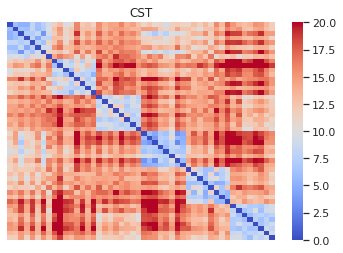

In [4]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CST")
plt.savefig('cst6subhm.svg')


48


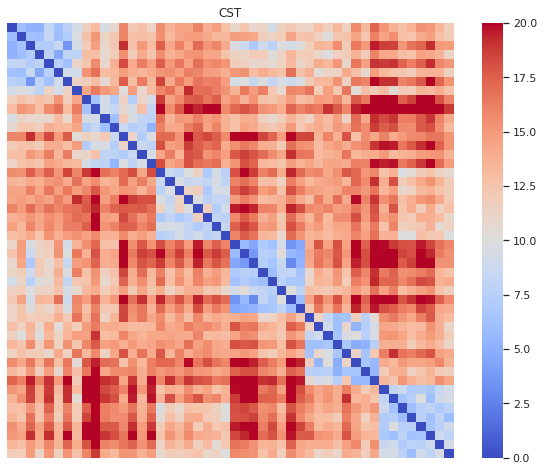

In [61]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CST")
plt.savefig('cst6subhm.svg')


In [39]:
#tau = 5
#importance of node score
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '0798q', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# sub_list = [sub_list[i] for i in range(len(sub_list)) if i not in del_list_]
# sub_list =['4917f', '3571z', '1665h', '3832y', '0097p','4680i']
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes())
#     return node_score/(4*eps*max(len(gref.nodes()),len(gcmp.nodes())))# throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 5
dist_hm = []
del_list = []
inter_dist = []
intra_dist = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        H1 =nx.read_gpickle("/media/hdd2/shailja/Crash/CSTsphere1brush6/H_CST_sub-"+str(sub_list[subi])+"_ses-"+str(i)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/CSTsphere1brush6/node_loc_CST_sub-"+str(sub_list[subi])+"_ses-"+str(i)+".pickle", 'rb') as handle1:
                            node_loc_all = pickle.load(handle1)
                        merge_equivalent(H1, node_loc_all)
                        annotate_graph(H1, node_loc_all)
                        node_list = H1.nodes()
#                         print(node_list, node_loc_all.keys())
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
    #                         print(node_list)
    #                         print(node_loc.keys())
    #                         node_loc =[node for node in node_list if node in node_loc.values()]
                        x_c1 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c1 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c1 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        H2 =nx.read_gpickle("/media/hdd2/shailja/Crash/CSTsphere1brush6/H_CST_sub-"+str(sub_list[subj])+"_ses-"+str(j)+".gpickle")
                        with open("/media/hdd2/shailja/Crash/CSTsphere1brush6/node_loc_CST_sub-"+str(sub_list[subj])+"_ses-"+str(j)+".pickle", 'rb') as handle:
                            node_loc_all = pickle.load(handle)
                        merge_equivalent(H2, node_loc_all)
                        annotate_graph(H2, node_loc_all)
                        node_list = H2.nodes()
#                         print(node_list, node_loc_all.keys())
                        node_loc = {}
                        for node_key in node_loc_all.keys():
                            if node_key in node_list:
                                node_loc[node_key] = node_loc_all[node_key]
                        x_c2 = sum([list(node_loc.values())[idx][0] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        y_c2 = sum([list(node_loc.values())[idx][1] for idx in range(len(node_loc.values()))])/len(node_loc.values())
                        z_c2 = sum([list(node_loc.values())[idx][2] for idx in range(len(node_loc.values()))])/len(node_loc.values())

                        sub_r = np.linalg.norm(np.array([x_c1,y_c1,z_c1]) - np.array([x_c2,y_c2,z_c2]))
    #                         print(sub_r)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn,ins_cost = 2*eps*(1+sub_r/30))
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        print(dist)
                        if dist>20:
                            dist_sub.append(20)
                        else:
                            dist_sub.append(dist)
#                         print(dist)

#                         if (subj == subi) and(i==j):
# #                             intra_dist.append(dist)
#                             print(subi,i,subj,j,dist)
# #                         else:
# #                             inter_dist.append(dist)
                    except FileNotFoundError:
#                         print(sub_list[subi], sub_list[subj],i,j)
                        pass
#                     else:
#                         print(sub_list[subi], sub_list[subj],i,j)
            dist_hm.append(dist_sub)

    

    

0.0
5.975000004700101
5.210737936807718
5.175557751649659
8.154820256602747
6.142442377621437
7.613938685510849
9.177249595185533
13.582010665727458
12.98048011306949
9.023378093375001
8.044301165655368
9.996457363984147
12.818948134979564
9.75597393074369
8.32755187904571
10.28549569021628
11.073021705511211
13.28381817722958
13.341415989107729
19.17119222225637
12.646728331567541
16.23972163374943
11.772891652336515
11.627690558712452
13.123705067497905
9.578502004378507
10.681409653465927
15.87573222594964
12.023670739745345
12.768866498521271
11.195343605161133
11.556483873632075
11.322402355993887
8.977023994262904
10.991899563517062
9.614445396042084
18.518454327060148
13.054191320477875
10.097093939696881
15.581283350700481
13.640804843334326
14.477595691934576
14.421534501977003
16.085257008678752
13.790550089358826
14.657686093297448
12.839408453816056
16.005456216923214
12.37217443775987
15.242942498431486
15.601564770716056
17.572055392496324
14.799574428146897
12.5988487605

10.616708439065444
10.91398943987835
12.275448125429692
14.269197648467348
12.203601911302396
14.216406235559951
13.42707010851036
9.416941913315041
12.551233402969723
15.547248620426707
11.239791220701585
14.84538680506631
12.448274118642493
19.7833094799074
12.341135299825499
14.560546567227277
12.338862863822937
14.098036112849671
13.721361841244985
17.565861570564955
15.683968379115704
14.984644669755044
14.01409706917158
14.34487026600802
12.28652169641731
16.11519325444601
9.614430666249955
8.72401582980926
6.873361691201532
8.94656587854432
7.531826416600708
9.950215893539458
9.219256229999646
10.115765393324624
16.94815416399681
14.031346656511673
20.250411675314936
17.266986062215036
17.590810593968236
20.611410868505097
15.030950366283871
16.42572551691611
15.831315824030288
17.304812078051867
16.967911639388213
14.778489683182507
18.38218003234109
13.532099323340816
13.877232332641633
15.851654022520574
14.773830709956322
17.972039715254226
13.581489002159783
12.545892031502

16.23710201550512
19.2934659514857
15.601332231062699
15.87788723924799
16.506725308694158
14.815532741212504
17.12339214956197
14.428852350661803
12.609796537348315
16.322314968264717
17.6161735295617
16.611880577069144
18.72586135172157
15.394643261113995
14.397966812142212
13.453176653019769
22.08399397010178
13.475918815349793
17.311148486847884
22.025164916453026
13.058418017744014
11.961584025463761
13.989663485826428
13.30125310244009
15.115896691671395
10.906201668619328
16.633821511436345
14.717197114345844
18.99222780365036
18.775932815638484
18.99943000891261
17.36554246954388
16.23540120947823
17.568888300461317
19.182269215940337
15.933483517441227
15.088834084013339
12.906311878389698
15.049295537478338
12.120988243501538
13.191247727948738
11.81350286217312
11.313736106281791
12.937150792547806
13.188068912161306
14.581850666421754
16.129550722892233
19.032599813298454
20.42635116878224
16.829478308680265
16.58922340605312
17.00234459390682
15.761280995782595
17.47029917

17.535055948955602
14.545633054978737
17.090252429826474
16.970911156384
16.123816788178175
19.98828685493618
17.732786328308023
16.703928430597436
15.327210920784314
17.322134679243998
16.099791692294417
15.988009606782512
16.288504754577993
14.175109693745494
15.896559355408247
16.433395012279146
15.550492754435627
12.9216080776375
13.137944097474872
16.512384670629924
13.755101701582173
14.432659408324476
14.058510710408491
10.325862088945126
11.427916296838031
14.378315959234996
9.560766116934847
10.420741053160167
14.180446217084697
9.643604280384066
10.564321341597845
11.810281390025166
8.408008962458444
14.49648249995175
19.430055660558
17.609018859171876
17.196217404105884
16.36354921958679
15.103053825285919
16.085742275177072
17.96561499999516
12.870349262465018
9.177249595185533
9.7310988118537
9.368858093549397
7.835936630242765
11.241412296672866
9.19441294612789
11.287462497661782
0.0
9.354713697618571
17.97687480271094
12.514218769997893
10.884485384459769
10.95814165258

10.773348015334902
12.3006268702934
15.41878829713883
15.976480545908856
14.460501712676976
19.635821746191546
13.367787581592435
17.001321843724646
11.9700413197284
16.36554218728982
12.207384889279332
14.8280491501022
12.578911211613354
13.15632291406637
16.670285550836216
15.957961299573851
18.877757324043102
12.859873364204425
17.174826382574047
15.760968319118303
13.669614137644356
13.758529598840113
14.90066763037259
14.561116255611548
12.998392393059877
14.6857017447069
21.132869815205666
16.49659859402716
19.32541331124285
16.075142685776797
18.377942679922562
18.733922113264878
18.33476711558714
17.559064134069903
19.09700988091198
16.57398053026291
18.854943125049324
18.70572668828924
14.30900519324265
18.004086068494054
15.740946704272236
18.01225288443286
13.133645018034386
10.493579840824196
13.569631844283016
11.817208835111684
14.742130817875925
11.31266729295667
12.838562740845262
14.670539838807262
16.850431182349965
19.972855737734214
16.50004852196637
18.872623322664

13.250904225181404
22.96587368269762
10.775163757397639
12.918497126181563
10.394565973509952
11.520852428907236
16.979600976679286
13.610296656289364
12.505823994338186
11.558771612943488
11.466692641655907
12.682586603615349
14.290317835691333
9.076646712788904
12.363600460784781
8.497375560648006
13.607710463593312
10.65665596443381
9.880595306804366
9.091233283416388
9.047280500690281
13.276690252437813
13.426387994064752
12.884313722843014
11.417525399305946
12.826106374746477
13.357173959285523
13.419775082015502
14.329400727416715
13.014454414260337
14.393651198532801
13.282869351079654
13.26855037330457
12.557608110250246
11.97559048476709
12.725553319140367
13.155225242289116
14.96251933811555
13.982936765581034
17.58636721563506
14.752462045852944
14.256159807014859
17.872495449894227
14.385400822088739
14.084973719650627
15.52790186755632
15.273189648690924
14.633447550586682
17.037272563731744
16.84675277076813
18.071291481385334
16.89489174746983
14.547555418055715
11.9707

11.337202718657355
14.983900480500308
10.852690793949364
12.33581862529974
12.630142755053402
11.281915210893786
21.944076835544287
19.16185682349893
21.03406637792969
28.99161895108852
16.635183658531396
19.57277662087854
26.403476177164617
16.491370437348976
13.872054966490087
10.462050620226002
13.592742136769566
10.266622906366603
13.767572201320576
13.319019398388022
11.740786245163381
14.859150370968852
15.240120136400403
14.50000889484203
13.296060935126441
13.35477022265174
15.322030462487135
15.613660366050066
14.08148365724395
12.225068882922091
17.678306556047843
22.081089723066615
20.768718170148617
14.286341330748115
18.5351572489843
16.056664704261344
21.495567220152587
16.464239907130512
16.962659176765758
14.362317218846254
16.24921210599102
16.762477532862277
14.619467724614633
13.939165401433945
15.143382826846793
17.39996492056267
13.51607991193163
13.322770116215104
11.554884209586701
15.88860089937563
13.37575596606423
11.850431155033567
11.854251906100075
14.91558

13.302708274340691
15.77489945097103
13.795319021384525
13.734220278553073
12.835722091130517
14.385291323057238
13.825623402168464
13.921981969748192
15.437416848701424
15.59170825923595
8.390839688687404
13.007231027356141
11.951694519397035
12.619220395881982
10.882464894279053
11.130997025653148
10.261262286615203
9.678274437078013
12.574595697161238
14.984524551364633
10.924461267850173
12.21365989693229
11.438453300673178
11.320697347164678
12.750407936224175
13.42199134422594
16.753652572021725
13.99151077425724
13.766020585885677
13.970106584294609
12.338455773032813
12.756060011202411
15.054999659833888
14.085857658046287
10.28549569021628
11.87075214841952
10.510282906783619
10.362895590733308
11.865375849101383
13.180968505470263
12.497612438105016
13.484203690091277
16.211753626399066
15.41878829713883
10.678591483027091
12.679414070683183
12.904413957735205
13.810438754653541
13.293884795047653
12.298371621608098
0.0
8.366054390796386
8.02135120259366
10.164009436172199
16

19.389834785360634
19.66371052792359
19.49341672432281
17.60635045366709
14.722386026594776
14.689706992648704
14.794752159903641
14.477272579949592
20.181018240623693
14.395892877862742
15.020743197748494
15.294596496418542
14.35711642083114
16.478855035045775
12.239956874987504
18.55753865285967
13.241114452869123
15.361961928776577
14.474724347769714
19.892770085031607
17.068312749102425
19.62244796995773
20.25963538053182
19.856696820142393
16.82258420227271
16.263194091678166
18.53884711634381
18.67768706128625
14.108055661768837
15.247962807698531
11.838882142423193
20.090227511521462
11.919270986299649
11.748664471661286
14.723813912742095
14.63349491476406
23.546241482671324
16.04906160569621
16.649846309794032
16.229782496263848
11.390013909571085
16.142671828842875
18.444487125592474
15.166733737988084
15.125645658551989
18.472182035774107
21.531695359688573
17.536571658400124
19.13192143758804
15.797780671110116
17.986026184448765
16.497412709309877
19.06558891721722
17.8678

21.347063449652367
17.32454542609682
26.439284976692868
21.58957279677726
23.99880240400462
26.44887869066583
23.32626087003809
22.223219141009835
20.92646128771294
24.576920131419236
23.411061586242226
20.180503798815742
23.823985619963647
14.603264143853
16.63163545431874
21.026898912524693
19.725713939202446
21.05008350891837
18.086895016484114
14.758082532772015
21.778852888480017
23.076948809439003
21.51295203111888
21.078510962558425
16.357755590211482
14.03864553811708
16.330971274199936
19.22475848595998
22.96661720751439
15.501430085998013
17.818371719972482
19.01126033928669
18.13780470190738
20.975014611792467
22.080032210104648
19.85158544833638
15.337422891891634
22.27373347067722
21.494131095052154
27.545607940031722
24.20361770036697
27.759568735810596
22.97952125460337
24.314666603661212
24.94135526739793
27.263810171387874
20.543525168380636
20.601251992131914
19.948892807710816
15.683228505328465
16.351141264528604
21.702226708517962
17.373415483927545
17.595187918397

17.02620119774844
14.726417176185354
12.142804166383986
12.696374744445095
17.78393247113786
13.164252535841158
15.030902076288017
11.072586104613507
16.936280573538454
13.125753238729278
17.634957836743347
20.37784238493729
21.015860929021734
19.182539462559493
16.0170398446028
16.656274977115217
12.885173123764302
20.521170488715516
21.627599830007348
17.98812212861356
23.664008117841583
20.835136161288396
21.87406991893579
17.717828974028112
21.13815949978399
21.398279903668488
22.006109078947112
19.099368288625698
20.99878541083003
17.74871117877366
20.823267982191012
16.85850582239535
15.543218032436783
20.344295264758863
22.157773747324093
18.00100913249401
21.535539361446
18.494914118305253
15.150652214163326
15.427189439254342
19.992193837602024
13.460345351894032
14.404455490078558
19.7647068004331
14.512448803845205
16.472440740816538
19.056869990084117
14.39859925281278
19.33067299126855
22.326216755690545
17.45460847539387
19.95472489427485
17.455699619638757
13.70424871591

22.173081400771988
19.212921372675787
25.354109463255952
21.160722418846674
21.91083518260327
21.209009089265685
18.343088431163523
11.572009261032122
17.12405239998467
22.67885098808571
16.6315683123984
18.038543745368546
15.067744999977142
15.138478226848475
21.980955825614668
12.646983230157321
18.114694002467857
15.12762891668565
15.148724639717505
15.930187072498342
21.960353424513233
13.128368028901757
31.689959801235005
10.945310797034281
22.38052268980212
13.732657974404255
16.64742004803221
13.52251413358151
17.03839215188824
14.526510232763357
17.888142542766026
15.870187201959869
17.57649153606806
13.994730201347835
14.013086161515888
14.869216658175992
17.21218361977314
17.231625634500823
18.033091002519534
17.404570675779187
15.31489891125271
14.938781605282468
14.04519253793642
17.354341302923437
16.062228153533574
21.508004105438587
16.700694998657262
22.132114120890684
22.736530044384896
22.478563502369894
25.901524348799
21.438525850471613
22.00763243180529
15.71171894

15.03249460209523
12.341026596725037
15.66551149133338
13.86378273107178
17.571137408751632
15.933446060081323
15.532100623256913
18.87994483113485
15.203338910734232
15.005261567095843
13.639878975162086
14.659684534557268
15.242119903960933
17.488713841218463
15.387991926482481
13.989900268810114
13.908156001492838
13.31656285170797
12.75818514209153
15.795701873996387
13.42471366979731
14.590345537258482
15.524462643687972
16.150008537543155
16.037811344842773
16.034780737401924
17.481960623061344
18.06052875104698
15.217984900218463
24.85587563821842
9.569381638490848
15.390917940787235
19.497335652126928
13.108690921687462
13.485791625620756
14.100657537364818
13.227960138622837
14.948834128453246
14.3204395828121
16.74481452777421
15.63555118540864
18.743707103893136
17.51489454448705
18.05045273698248
15.755407995556562
15.588520707819756
17.725685138002653
18.06141424395958
15.682850684920098
13.14886304905098
13.521896485084818
17.24460824250177
14.375111780395295
11.879879242

18.652456579843133
17.613163382071534
16.77133368106646
21.615825002990032
18.71750694351811
11.840173994796178
10.993930406216638
13.505852532570124
9.293060591304993
10.769721781640534
14.216482354800254
14.089832558841925
10.94947479361078
16.078324059455504
18.226181062054856
16.027491664267295
13.29276517779547
14.499539507768658
11.864320783249024
15.052772480334255
14.476174316471015
17.687860254519066
15.78987674431314
16.026009743979102
15.223491352464588
15.392691758936621
14.174498294414521
14.318458772804842
16.409972876406332
12.768866498521271
12.896800020788008
15.065415304584803
14.094360901487866
16.2862584763308
13.487780228164208
16.356075525500987
10.825239537053777
12.570952886958736
18.877757324043102
14.219447851853449
12.853600046426443
13.30823946287583
13.656075517053193
14.745676763815446
12.931621393802434
15.84209348931957
16.755872688937316
19.66371052792359
11.644285201999082
24.46413219789325
15.672774047404335
21.190044670735503
15.55649312981916
11.181

13.83069552141064
12.96993090209794
13.109940780108694
12.493997879949466
0.0
9.045971544496862
7.175466988425184
10.290280558687385
6.910875960109079
16.591105754808197
10.455326515333883
6.8643003957645785
15.068870936744462
14.034849465026795
13.904346963787887
15.844600452042263
14.352198603497074
14.551158764612804
13.936945175106493
12.316861883568816
15.564591745921891
12.932083467366363
15.500955778266956
16.110678329038304
17.640368042274034
17.368140883561274
14.286492767997068
15.361869612585313
18.722542872103556
12.781546867825524
8.443066487525197
10.645462309411485
18.387657241614118
12.660486959433307
10.606581601408697
10.51147881205717
10.912828337475611
15.09761749412553
12.750745248270837
11.45028596870792
11.007569469821625
10.916077061560935
10.089618002864153
13.20053261254811
13.728822950704275
22.124627908716093
10.664601010355927
15.802972966218407
11.85335894933191
12.046707766388574
12.612056364300468
11.514413514226003
11.978089953314257
12.046175233637538


16.922062411379077
13.578407980925961
19.244776748326924
18.99864688146683
17.304787924817848
20.907027557630926
16.67246399607879
16.741263872854624
16.26929562321548
18.525059525598138
17.395702634273963
18.69599017570097
18.445029180836656
14.462040872213718
15.48403573945997
15.736105016808034
14.214566462206047
15.634450986205696
13.149488250125415
11.599232052442158
15.781156202310736
16.703388415358717
15.620268466801598
15.537942490912643
14.287799649321302
13.472394440741741
13.904638271246665
24.10791808144881
12.919091297057946
17.387855550532528
19.04868219170742
11.23280612007076
11.897042404376638
14.286149929545779
13.937566315249894
14.051688623574972
10.100453687660277
16.270151179202816
15.164368312293758
19.92218970747718
18.882828916114967
19.31878901514797
16.98221591603176
16.495851854142153
18.294750812167518
19.900489039137145
15.646440639919348
14.327195237433656
15.052984097967656
17.479817718090843
15.367025354874954
13.243757731324115
14.435109893920274
11.5

16.098629773681857
15.567518975185106
16.860670443066173
18.785430367176883
15.486602933917357
12.328670655882082
13.43451827167603
16.81405711863016
14.042990344672374
12.546503175313482
13.999551089751387
11.300040394086476
16.377398240304274
13.500329872511195
15.691017185411663
14.886624064532345
16.69501184685663
19.024587631470613
15.192213737635942
15.557874329656373
16.791041370742484
16.506376477130956
16.583095206485453
17.164649838482198
15.30125189934914
19.602072404689036
16.91517355829418
15.970127943885291
15.238500399958923
17.502085570848756
15.64203062599483
16.896762910392745
14.129891380663166
15.548078872454095
13.826846975230133
15.823184851771604
17.367229460520704
13.493559845964054
13.112798389100178
15.538178462345996
12.02891537819553
15.265210718629614
13.260164589165768
13.239186872332706
11.864030497311315
13.030202216397244
12.068685641304743
12.518359452892039
12.830292559456442
10.961768044126822
11.634768411309734
12.407187915996236
10.491307141269056


11.486599258398225
9.22746795250391
9.051632885262045
12.191011185144653
11.70591032212561
13.382987244671977
14.267351202014275
14.6857017447069
10.970660476851332
10.722044340407772
12.569332634770351
11.541038818362662
11.873257266698381
10.531488874551236
10.61668016826398
10.78544719142123
15.020743197748494
14.553958208844891
17.712662354064307
9.881490133806096
16.288235437176397
10.373032150146301
12.171998464141401
13.177501364970865
9.401102626523366
11.754301622181423
15.503192817175911
13.27258566610579
15.489396014804212
11.706321782144506
6.8643003957645785
7.945178433188024
6.839970396159659
7.578319302513358
7.974752820756396
14.127498864257703
11.225090123977743
0.0
17.363361233485115
13.56614874922601
15.344200098747663
14.462751236594354
15.497906891215797
15.405696457944433
14.576096502720938
11.61410939996245
15.115666059689255
11.419042540052654
15.683521874485724
15.908302404952035
16.440577056115337
15.946050599860886
13.25062433806967
15.02395312549492
16.61232

23.27026214020266
14.742676148362936
19.969450866099457
15.364119895433488
16.549971392514266
14.64636671766609
15.78696150270171
11.753717517365633
15.459780940133186
13.414508622398905
12.437312525385316
11.871748389506337
12.488307632445721
11.589598518159535
14.345604213825139
16.053591399093342
16.82668385104597
16.01154035107052
12.770110298549787
12.998112503758147
11.392959452365016
16.176034045136987
14.64142678153877
13.861703055695518
9.53576306002099
14.256279135409805
12.77948013947514
13.44611345482985
14.485111857475266
10.976769605223843
11.64176126839294
12.284694233359188
15.177053863332782
15.404532785611806
16.95718689658117
15.958134818713933
13.354061647078368
12.466877724173246
11.670434770040078
12.756591947018215
13.789034907459987
11.422058156764885
12.326506899592108
14.010736771536127
14.910202610624477
13.843496603371964
14.242812614361352
19.245390225007846
18.56691207856953
15.912095126593481
25.86610756224699
14.385113043604207
19.551831634981202
23.7417

15.668032802934018
14.190596066489404
12.128139610076841
12.012789322946947
16.386980384267332
14.067537277444305
13.978254410723213
11.862098152271464
12.59904800745834
16.086956301271478
13.668219554011927
11.27746819267768
11.61362894919101
14.159117058614388
17.62535155294779
12.629781415616968
12.973831557819373
12.364942134244348
12.89845723426956
17.86015619689424
19.965692860986305
14.620863994357492
19.6671317130455
16.568236390833054
18.968096783371795
14.837133629278561
16.55076128001376
17.466769643669743
17.55405197404258
16.275238616661547
16.971105854071794
16.358651332525607
18.226214944587962
15.61365551806286
14.843910532191806
17.713039869870308
19.419027321235312
17.026718804692607
19.653313468317233
16.783841784917033
15.262099137608512
14.37556819454569
18.16326512409467
12.621588611788063
14.993775786801404
15.221739898650094
14.108224649214211
13.699660353557888
16.905000050627134
13.998050008994738
16.095775325269248
18.640362268889366
14.792829935935275
15.982

14.838095112076122
17.97707557490307
13.91813150186941
13.942347610768309
13.47751828829718
10.233515555363642
12.316997250776414
16.69193136619052
14.567363398921746
14.657686093297448
13.41144275678527
16.000908707433346
14.393857894882284
15.793551503593537
14.652051302840414
16.280330838207853
16.27840273837707
15.457609320777074
18.33476711558714
13.76314591056879
14.835846659172024
13.952243876318954
15.071385037432805
16.534054223990548
14.683587000675015
13.778905144612153
12.055914186736203
15.361961928776577
14.936098960139754
18.388653445738406
11.403646152466056
14.360641419190783
11.966059050780677
17.5092445191097
20.404326538522355
15.284772633289192
16.02703701788487
17.577362882855844
17.403155391642336
16.009688278415787
16.880555900759063
13.936945175106493
12.4033689057316
15.450690855085275
16.30989132569859
14.21281033554809
23.20581390125673
15.118990760957624
14.576096502720938
9.402936812774982
9.478961036723506
9.410721150563024
8.34287164004731
7.186212202647

15.791382259243449
15.527308225714204
16.415943903057094
21.425574465447426
15.75901253239622
15.115666059689255
18.880656312526426
17.852398551053945
18.24928413205516
18.08895901421717
16.369263169480632
18.32074370349895
16.669922625091253
17.382987174603144
0.0
9.306240136374122
6.230421094227269
7.313603472063797
18.820499181294288
7.579225667707088
7.643957792537979
7.077861320787578
22.843046372240266
18.301934185030866
16.693656981965677
18.032738791727912
24.51542293247134
16.771896015435388
17.132147002892857
15.61678419109964
13.776018521629906
14.074599510367007
16.62812347545534
14.052705067791656
13.78284478846164
15.871166825297431
13.64772391792729
15.092241589401564
15.801046579088455
21.680463971797376
16.204464599182096
17.280006535365477
14.293665874509866
13.968068467058579
15.28531798544159
15.760357001239974
15.39495520803599
16.12086384846354
16.63136725034133
16.539729501179732
15.675423998127721
15.57564746966628
18.037935815595233
16.179198296137294
19.993875

15.180053538715555
17.82575554262406
15.322062310266393
19.82150322777891
20.743797288892484
20.083025148097832
17.50093214595029
17.266980616594296
16.57357883457269
20.196995757235193
18.9226131321653
19.394139783432166
16.401325497352673
20.66929611430218
19.550863035590776
19.34648838844287
20.509108771986533
19.384425040527322
18.607414232330907
19.661370610374014
20.14614034297975
18.89321043163663
22.196775989701923
20.692526615027532
20.403948049276227
20.630117339649942
18.126006992214165
14.75912456449393
16.859831193187553
15.514653274300716
16.498891773371035
15.727220753648666
15.811311023458234
14.87626533972561
16.73294301682082
21.437081885846467
19.47763975932093
20.151191358714357
27.185436682318873
17.912554679822367
22.67843357302587
26.95289033037041
16.950832726744277
13.630850664500883
14.08646721971888
12.94084412137627
11.864429046771544
13.856017888296968
13.625516558459537
12.497347233469153
14.758197436393182
16.8925706984086
18.507575206420594
17.3345289952

25.20037647727024
25.22657142591586
25.0808440243222
23.202783744136646
22.752323733358608
24.619526382107047
26.749688109018507
22.60987991697802
21.162954464564805
20.36277909772983
18.122410440124447
17.570328607552213
20.047623289412655
19.014802669247203
17.391754539637024
17.012493752142273
20.84920889019807
17.904148138499934
21.59090657894773
25.641800563465004
25.901172505490067
23.612449079764453
22.139060519700728
22.239188259408145
17.86849270698935
23.147727104026536
23.27672909337694
19.849724773475508
26.641689968274708
21.883376601602528
20.630462948834165
20.22685054868927
24.629329935043383
21.196532473923625
22.41229171816959
18.10929733383294
21.048053119721267
17.215808733704243
18.911761466088628
17.176448879337116
15.424910191935286
20.859620683585987
22.644319538842154
18.529950034188943
21.13738352294629
20.05197835699777
14.85739357871681
15.095154968901587
19.39250989443037
15.903863994499492
15.953662186677349
20.771478796858226
14.790311263240705
19.2837190

16.098266650366135
14.453039654651114
13.859541503739566
21.264022586038376
17.42535940868526
18.827922539332786
18.07355476037352
16.520460787649824
17.880277518915804
19.614075787405717
17.210198700595235
15.179740552783613
12.764594848567535
16.574351159497652
13.815154350627
14.209169224463817
12.964151304645263
16.468905759869664
17.104144920997776
16.58794706160518
18.01225288443286
15.040179456955249
15.202838722419676
13.744737760418987
15.362622020307395
16.80145529297669
15.039115875136165
15.874392709287697
13.245028105433029
18.53884711634381
18.385022013177917
20.93552325135167
17.38721617333496
19.101688804761537
13.485856853551876
18.327916944223183
21.91083518260327
15.551530734930445
16.532985382338147
17.69732123845771
18.580095308309094
17.888456668430017
17.72342556104338
15.361869612585313
13.41813302047723
14.857891484397005
14.527771210231329
14.710457485604604
21.577717234664313
15.466394062545817
15.02395312549492
18.47615181822752
17.326372098690648
17.9442207

18.301934185030866
15.81518820843561
18.1049525733775
17.92984689150262
14.511011928454291
16.597865630628842
15.434426832513957
17.146825386865075
10.494695530601675
0.0
6.86208523644617
7.245734650626841
10.761176627546313
7.757361078629081
6.426964080608877
10.41827127413445
15.831176386858406
22.399232710251596
16.62285970671162
17.547644644508583
17.486446610503855
13.947733311283464
16.39389603495491
19.73063971052339
14.270099182287044
19.143638701806367
15.651060730999973
22.491920297120863
16.296586123737725
18.291831274928068
14.801210669308016
17.368839909917757
16.91490160286708
20.365411855005902
19.258301743350586
18.424261939363554
16.85579265154677
15.976291128953214
15.34477417953321
19.513673696403387
12.208971011521605
11.427307935949159
12.586063638142505
12.946530102262424
13.16294156263586
14.999036308167582
12.251343800795818
11.688408243912903
19.127798346941283
15.59633467349018
23.30143860145187
20.27694224987866
20.108135012715668
21.567220618100528
16.746383

17.52822192927666
17.913420100804636
13.830573033811223
19.936523671145174
14.569180827763711
14.931557432160291
17.170418200064013
16.051333921770365
19.99848678559867
15.8958197628927
13.231878343147596
18.804500242085297
19.25791581113251
18.205391974649647
20.97242787022167
11.430890867547646
11.198348122733321
9.357549569694527
17.700960952666808
10.87598412268443
13.298428400461018
15.903499417013446
12.48253399607045
11.7777138400788
16.552346002707797
14.750148480144308
17.685444432054588
12.62394840032138
19.487007899787066
16.47083983978927
20.59688755018621
20.061970584541598
20.984642076065985
17.636380077510253
17.349476339205193
18.7744266770095
20.380189613825735
17.148097128113395
15.683832043215478
13.27048356064099
13.746230754810956
11.255206890638531
13.040042067115737
10.289088257094656
11.860628349800303
12.134841080886503
13.366010625399964
14.712476543006517
17.15481094463324
19.41438089674922
21.66724321215785
17.199814701747492
17.59836004827708
18.15329332713

11.256745946323319
12.598958762530348
13.768389334325153
14.656084855202877
16.79437668193706
18.039634349058627
21.23647734102587
16.081084185286855
17.123271536622894
17.78286611553056
13.642151943573822
19.294194721991474
20.435875984057475
17.58701181728835
21.887167233434106
18.877441865167036
19.444273990866456
17.476413729463214
18.319328853829067
17.58520514256444
17.277695252876462
15.34621520589627
16.39866176472114
14.516939253191582
18.174147345676303
14.988844772889863
12.402274268732281
13.265824430140594
15.89470113804028
12.018007271469152
18.03493546424927
14.413082997182165
10.305895524486203
11.753463537461025
14.656334954239245
9.726517984348533
9.436296246131487
13.609852958233883
10.758920410627155
13.272301433640761
13.951932668150587
8.987710132909495
15.255805909719466
21.793670378643412
16.518671195738342
18.126229647814142
18.513611880543657
14.802461869341947
16.129199958652688
18.789968769828633
14.460477598294208
12.656383542123162
13.593543838197784
10.61

12.398526645715798
13.618080385993022
15.138478226848475
12.835699119396093
12.49093136768732
14.591711954293965
12.062496562855113
13.509624505835628
11.659288030290519
10.912828337475611
12.366367634400358
13.782038054489707
13.420677547775039
12.534550735663892
21.071620302206433
15.781556990450271
12.145944862384125
13.612585981700715
13.175798760356772
12.75861238209306
14.560977838928261
14.520991714309762
13.111895364889627
13.322366123795327
11.51605098670326
13.776018521629906
11.7429287403743
13.641151902648005
14.993320704514112
18.179626660602448
15.300392593655673
13.097634039267213
13.660149504481982
22.933071935391894
15.831176386858406
13.106832572206258
15.15659995988095
22.81359701870636
15.277890093906182
15.385433356919025
12.819353411920323
0.0
7.017249079866509
7.30231550270404
7.349712449296874
5.135201944657668
6.411488744977776
6.512254914872575
6.6455518681412435
12.1056142942661
18.562837780096288
11.55767666800076
16.576191251797237
12.570393053642217
11.806

22.93431795882892
12.724374304649228
20.211584588080626
13.654199276757925
14.877390918123702
12.962714556492028
13.903274819995701
9.85746088670549
8.988578012321073
8.300527546875824
11.397433880356047
8.86040924046987
10.174243678419042
8.833713472650974
12.26730405281145
14.872978563547182
15.260398239241248
15.269131569917873
11.478982017181007
12.519762241500421
11.739968703034116
14.564596293009501
13.860320125577925
16.70543502936927
12.558776585973693
16.45046295761659
16.377158731322076
15.482118020424723
20.13533780228687
14.081665983970261
15.85185249349087
11.463971814313556
15.82366541507061
14.994739430698548
17.343664396974397
15.170395650555921
11.493611244026688
12.213485070802271
11.52490835329533
10.755764358118412
12.995485575959393
9.91579844179249
12.076784362020005
11.399088914278991
14.095303209163347
14.250237789147167
12.913649862935394
19.08360449171958
19.101522712367057
17.91671129520406
26.526734608753852
14.306362749208251
18.703835767308743
23.555608288

10.455678736464165
10.245909979199567
13.7477961457991
11.455664717323556
12.140041676617493
12.163326640535082
12.544223636928066
11.312782291245417
10.602236844974154
12.934666460640607
13.96781340074481
11.916602332049365
9.779811666343132
13.244212522395987
18.640160417418763
16.210750408752318
10.874983464779682
15.70904616188478
12.229002577527199
17.5627901126293
13.395301621624409
14.571953506459906
12.004599645346211
14.168945985102386
13.941268009127226
11.6304425098827
13.380999005457372
14.914845812227256
17.25941047780148
12.09524378680516
12.45387642650277
11.656663532474816
15.612341100335431
10.648477123958155
12.361624535750666
11.673430457804331
12.55499908113087
12.991535827155833
14.487593676369489
13.287563267405876
12.92197227946199
13.477484679539137
12.962774019565135
17.598346178347615
15.145221452132112
12.616474676826996
14.3782390415725
14.078910686587998
13.148363741072119
13.512541245567064
15.481880587687343
13.105277123528907
12.347822063382603
14.175623

11.898108261478583
13.484624932568618
15.539903242921
12.81421042721636
14.476089698613848
16.04271518093502
14.258060761696402
11.492367919507794
14.598782036656978
16.2082415299626
10.111749084889961
14.10389808866179
11.984157701979823
10.336803290025369
15.6673034232322
11.747731003218359
16.026713280136313
13.033457723523558
14.389347692508316
13.280102684242456
13.832394033532088
13.5206427297054
13.416665164468714
16.33078452021192
12.289263511460746
13.4654168113704
15.547248620426707
12.932570366802732
16.96556941525052
12.447153917767192
18.40955205329002
10.032963273140744
12.573994336983555
20.286778094238898
15.454208736069361
14.290317835691333
13.98958246694505
14.450728216416296
17.489277719955997
15.325142792820964
15.079181009840113
15.496057555399968
18.444487125592474
11.519335112925027
25.96812886701521
16.70122404117766
21.223307887337743
14.28718817599679
18.687435794673995
21.960353424513233
17.32763146659989
15.671704899060796
12.248535159481817
17.335787729147

15.402252476785204
22.123106228132414
31.689959801235005
15.399744549831688
18.347719081562698
28.304624007382483
26.189658085791894
20.655947444292583
23.19619686599478
22.124627908716093
18.041623907980444
18.2174543878643
16.842998156397254
16.196265794535858
29.530963526591055
20.558200539450752
17.457705426072955
19.487956238202866
23.27026214020266
22.21985930274306
17.795432612319384
26.441687797556124
17.355301440986636
20.655416892921572
22.565428437147695
21.680463971797376
17.214848164196205
21.627343194674616
22.29819174698336
26.313109786555213
15.350291883722349
16.11456406937283
19.695973354476394
22.86752035203513
19.143638701806367
17.10954088733467
15.206265839101045
29.81403542852736
14.596855720476787
14.30417128024229
14.601002685025609
18.562837780096288
29.12555438946719
22.93431795882892
19.997719800373183
20.208446890239358
15.657628331826002
22.105651343748832
21.300317564979274
12.99792918363811
0.0
16.010137813505292
16.30905808205197
12.791221027587833
12.7

21.06660458995566
22.68859306737287
21.59791780247619
20.121299951749293
20.759199181551928
17.884208792999875
22.10957087807825
20.82850586647494
16.398772897313606
18.241149036218342
15.429359174804539
16.271896739425202
16.07012851199784
15.580161174118299
18.639010950768267
17.474803339127394
18.36660476157751
16.997049768927184
15.272172843996252
22.735966501488672
16.661068737338724
23.947573107547747
21.839883687854655
17.24694335783179
16.144161392527817
18.09057830286255
17.72743546516457
21.639670963291042
15.872069287291438
14.897257740366527
16.633147868016483
20.016406929115057
24.575720258343026
25.07763511863312
22.677040588721127
33.93661151472871
16.98431210270278
27.084903731860194
31.634148404724343
19.86848251220883
19.095971647015407
15.964314288170524
16.524742119905138
15.861901878199822
20.729519664883796
14.095474130984016
15.821456634228259
13.382211805777464
15.96447043461074
13.264656643192996
16.08997210993357
15.669969720611213
15.85315615914896
15.6783025

16.464131942978245
21.775926639667595
19.32700321426961
14.51966972884669
18.36498628841685
15.955796110833425
20.376953530146025
15.781953865557497
19.966254270870586
15.794661134632456
15.817626549693223
16.649524733838167
14.762816805934536
15.572710655063332
16.545874224392012
20.53399068651109
13.156061859520356
14.355653316772894
13.74657752396566
15.584450477175785
14.041733308510354
13.4082299433415
13.706075235172964
14.303268059082527
12.77105912690249
12.073785109620292
13.960066199466599
12.43878548950358
14.466355757005049
12.843165030718598
17.923044413094633
17.305904087039956
10.070773751273398
12.188876434784436
13.429243446553553
12.3260475127065
13.235016285813455
14.813478613395798
12.611864043030518
9.550079298841096
14.317517066803092
15.602501908182704
10.95896135155993
15.285505512211962
12.90200392217493
12.053643877335166
13.770680847052263
13.09607322866711
16.95026597184868
14.629142687966013
15.452576624900317
14.845092930065707
15.63693145702685
15.7351257

12.26808834530591
12.335513821009403
14.791317081620065
11.623184453481882
10.654077168257041
11.38642700517471
16.497412709309877
13.019681221195839
18.399868472594413
11.02989539579241
16.499446482813894
11.982406824704258
13.760642708556851
14.526510232763357
12.71603563593335
13.631274850912504
15.511227628513803
13.34567589956388
15.49248036653946
11.800215210030245
11.978089953314257
11.739474757566859
12.09088512097676
12.697540627611886
12.259089844059208
21.071331544885673
14.641025507768628
12.059936058855286
15.189536417275981
11.753717517365633
13.84058751344304
13.802902606315993
13.990763725366197
13.649534989942218
13.47119724041627
10.96585509406951
15.39495520803599
13.92456656464286
15.122588790933285
15.64865663361412
18.364361570225125
17.23759770444144
15.03457783033437
14.96340608854096
23.05595716560584
16.91490160286708
12.84851531288477
15.916943306789674
21.940901629132536
15.273565645605505
16.124265532117143
12.80236153964512
9.96954403759986
14.307499731284

14.646369171964968
18.107107515737912
22.795555575958627
17.4599282117851
18.378140549019918
14.534820204029119
9.011714605841366
12.335978959341345
8.300527546875824
8.006658463248362
8.048845722027876
10.11574286240825
6.3608095116791725
8.572663396645366
15.02461004107356
22.720554824506916
12.043265443096697
14.5108682216174
12.939972929804227
12.615924918483499
13.942872895987637
10.376725233027681
5.558397650184213
4.5702297933616265
0.0
6.870694479625598
6.372176173651057
9.116068262018832
8.5445529666426
7.972184021404349
18.218409010485193
18.871347115828527
18.093688572801213
14.812893290588853
15.606284097152948
12.798374247109972
18.21387449537697
16.450733503603296
14.494059533810852
13.570756429886995
13.081690125205355
14.187342086134503
13.489914526450157
16.768020873706348
14.18476451545434
13.940024574066777
12.470840333777572
14.383286034028174
12.969709832252867
20.31783348184152
13.664676663014987
15.671201636901875
15.497060361544065
11.912859513341562
7.878861938

10.507703379778391
9.707580857302561
12.824703629585631
13.686358436616084
11.469991868860287
9.379920202839454
13.987822903208372
17.213722253235083
14.885230049815707
11.601900471543352
15.950521966259803
12.447427120146568
17.799666474434588
12.178148584800201
12.36775871038471
11.142780974902356
15.090027430017503
14.249912151708305
11.51292872451473
12.002434331364192
12.989146222868383
12.401583671475745
13.103941573696371
12.610229495407477
9.974478304348619
14.593688540769246
11.981722322138765
8.751389097777157
9.792758307921424
11.428513505979682
14.581325095301029
15.837172248017355
14.898926700348845
14.997446095473062
14.285063649458897
13.4308935033736
18.4505160041109
16.36669329954749
13.781759841954093
14.542323406128855
14.493373136594485
13.987920482169486
14.026278521993873
15.22378799077201
13.280206246018814
13.23537299127894
13.171058711555524
16.605000271431877
11.715714290444573
11.573457510780816
11.384039544167502
9.967108265357659
14.367474840102089
14.16084

13.011548746591242
11.670630054298346
16.327732547459735
17.9567472465896
15.114159727908818
16.08792314728558
14.808218660817637
12.643818778739751
12.755385815430127
14.259185976277308
12.649299630538604
13.973440446451352
12.21073748469636
16.11519325444601
12.269242989454462
16.084460212301632
11.411951301228772
15.852411934179132
12.563514201563741
11.512694802701157
18.6500644191907
13.955487667221714
14.329400727416715
13.064567052326655
11.973405705011825
16.864325477656138
13.581844739286637
13.232533357346082
13.794164830078909
18.56874818420806
13.129185225146097
20.02944382592692
12.806323609390654
20.072269508520137
12.70800766229749
15.8872922291267
17.21218361977314
15.151960939532426
14.057994148293082
13.210557233111304
14.656687786176793
12.655836948648531
14.425864430255494
11.526097412557743
14.177283774480488
15.488499484487205
15.924954895698795
14.911837379639302
23.985910076536825
17.30682289489254
13.913245310717656
14.039768943463518
14.345604213825139
13.0862

21.968631467718367
15.260398239241248
17.982169517723804
15.262983692344285
12.019776037526102
16.211832697666797
18.119573090384534
14.015151839795308
18.927252375775517
14.521246882625265
22.68859306737287
15.513432034356713
18.25568358163559
16.059047060132897
16.164509041240112
17.969924677902824
20.833360774465945
18.871347115828527
15.4938580155161
16.646154321931363
16.8905432232685
14.123827633494606
20.317167722769423
5.8378023903917775
0.0
3.7412629088660783
7.441262071036585
7.3012873164329015
10.374867120354484
5.6762003561821395
4.9638066547418775
19.08958772240858
16.69021469413775
21.713940463542404
19.448471400080948
17.95178025231438
22.44355339216566
16.539057686162685
17.63529219397553
17.8327123299188
18.500583835907186
19.322049481795347
13.494748264482569
20.615763188394588
13.890800105471133
13.706063848106119
18.433104286856697
17.95466256162516
21.805217683014213
17.969956672294227
15.59585596175408
19.771172929627674
21.37231663976388
20.46545692456683
22.8150

11.800657384977335
17.470898895551855
21.891456480679864
13.825353638628869
10.959426968885149
14.119724266930636
13.087968303720285
15.212989337041426
12.55090881179105
17.540799838101204
15.999061606912527
19.10963388759196
16.474412748348715
17.46071524124784
15.491607064951783
15.768244845427038
16.311882155534523
17.078547465856506
13.54259865591895
12.660982354221234
11.204388473731289
12.967100184926338
13.421533737366069
12.95164597594253
12.036642433558589
10.944022829932456
14.066503464624734
11.917060309344372
13.753452084479573
14.57643732958813
16.883961849669287
18.604277117961235
15.436329538935242
16.48659288721811
15.773336787376515
14.918705228778542
17.150951122704782
18.601621517890038
16.195080149822786
18.892872555571117
17.200670530049457
17.916518557017
15.336718251889371
16.71780475207271
17.783513550933556
18.175036979141804
16.18352279501654
17.4805950823001
15.1852871418117
16.625762213396087
15.180587430212103
14.604244153540744
14.852084323449105
17.198441

15.345573817847267
15.259799661972435
14.595199540209048
14.451870808333833
15.205776692850456
15.262425439824304
16.769877270090692
15.485872587609464
11.174930358912135
12.797682137981734
14.656122994840356
12.1568258794403
13.17584617157139
13.616645606799345
13.191807800873637
12.743034344018993
12.75628706595847
13.79342257982271
12.339449634944827
12.311592959569374
11.345545417140407
10.986042960022377
12.300776539786956
11.007718888745131
14.487290371579803
11.519400956880476
11.885246709286132
12.335571185746723
10.47209615080514
10.50063716244558
13.34606353025912
12.48695909555618
12.083252106132903
14.508904578488202
9.219256229999646
13.488871184166783
13.132433454211501
16.8067506298461
8.873983530581475
15.9703158597596
17.958092088475965
11.044158730214214
11.278451698660135
12.725553319140367
12.881263467172033
17.685011924181488
11.60262109160145
14.31970219850815
13.425178600977823
15.682914989848591
12.205575580970642
18.074862863780794
16.320717760897395
15.8506677

16.849373707065002
10.150519523122465
13.861703055695518
10.517701887736905
13.857934691888541
14.492814229605193
11.126485616374444
13.056318664665076
11.525058528764072
19.607966075409728
18.03803558159321
19.394139783432166
20.599089345703522
25.114965333533934
19.53467537613239
18.342834765497223
19.21477107662526
25.733065413316215
19.127798346941283
16.282998940915427
15.06773929675742
26.09344672181758
16.835263150750166
17.295688685668615
16.301117703737674
13.758525341571886
16.885615242196625
16.70543502936927
13.006587375497901
14.027139647271142
15.936748556668606
15.310631859783868
14.032471832184354
17.20103396986693
20.64564820185602
16.105451297524034
16.398772897313606
16.642390901752442
16.211174818161734
15.949703739716892
14.53886253945855
15.565292882621296
13.875518709594402
14.494059533810852
12.139082093884541
14.793805446271461
13.65506648210208
13.463943166644272
13.424462003582377
17.52184795612397
19.08958772240858
17.395204353738826
15.163647752830261
16.50

12.30248509713444
21.55545019354857
21.713940463542404
20.752560525233378
19.123608797299006
19.691643933488685
16.00775500132178
21.14916275686173
19.317618761147877
10.407332701107407
12.972078650506191
0.0
10.080820147767108
8.184967292453793
8.54280567475739
10.150886144022017
10.276549972374465
8.012714634904764
11.039376948189297
9.962335726210622
17.032161346492483
10.641397748168346
17.267099257940806
14.465407050831995
11.355657602245918
12.527842553957022
14.391962752940888
14.070388004809999
15.77126100830328
14.765417423153792
13.406614254411327
14.361417449956676
15.987701728414795
23.94518610731942
25.145206399770473
21.308827104777926
32.983376734876266
14.561447221298792
26.932249991603424
31.22990590066157
18.312473415371677
16.70005713752705
16.187459427839265
16.4421637958941
15.9519449465806
20.193797669569697
16.41158950322235
16.793141248074676
15.163482886529657
13.967841631225696
11.666693289493326
11.260909662324805
13.043930071593508
14.17218810837808
14.58585

13.90214199832456
12.3322503761194
11.974636163320596
14.218062635588513
13.599784461187038
13.833199650332945
12.158319398587587
12.706289837126967
18.555605572397745
16.352607249049193
10.762212490655156
15.435751029464893
13.981586237012714
18.302775421275285
11.84527700507432
18.73641563807087
12.327659281854167
12.031895655655706
13.421633838349202
11.408447522165293
13.37447367469758
13.906544398803508
19.02440632420587
14.424093860025742
15.780581437360352
15.251888338024322
15.961230698899278
13.693074446843504
18.57491432930608
13.579225541035441
14.121715735268854
16.233189881986654
15.794253335994306
17.29757077093743
16.13716346499271
18.574615382179132
17.971473874956835
19.356928680973127
18.787878308290495
14.110332367162687
15.31035234461498
16.33342322213852
15.268199372810361
14.236184764516633
18.33928211566288
17.067948379387516
16.057035512045726
16.19440264746022
16.750969506967664
13.448164465020717
18.688292855198572
14.659213376306251
15.422312361986013
15.9755

16.197995453508458
14.473066932699421
16.69877189143354
13.60609116403253
16.478692967752202
14.652796732360212
16.151704876683752
15.805960398316415
11.370468109637175
13.37587815458974
12.372682678927337
9.099444805038502
12.233070306028786
14.360385962271378
14.252780153497367
14.74735795284904
14.932394233890275
16.42572551691611
15.168061422113267
16.086228139530505
15.137302004412813
17.504285574130442
16.943963421241662
17.459952463391854
20.14001318171197
13.895234860414874
14.084973719650627
14.625661494313935
17.322350236184413
15.270184165172502
14.986430931819157
11.631391943467225
13.246136038020257
13.303981542501049
12.356515005103269
22.223219141009835
12.927794174293863
16.935550762775208
12.144658087827274
18.080477377382095
22.00763243180529
15.956461431237733
15.005261567095843
18.41205833233736
17.85859889358413
15.176641210683055
17.752836704768477
15.676115541387869
13.88533362427215
16.741263872854624
17.68132839501714
15.434731319474821
25.172116735982105
17.51

16.590548450750102
25.389185167454343
19.58066086516525
17.588755929878207
12.512661387200424
15.177053863332782
12.133948349766928
15.54287587329843
18.052769213239692
12.483971887136892
14.640101524970735
13.963345941075836
20.33466130809701
18.361829562639404
20.14614034297975
21.22249020384797
24.771447755580265
20.059438963641583
18.830364635992982
19.848087926174458
25.205475262669676
20.480830429721802
17.61336197683339
17.52822192927666
26.507446552096837
18.028396385026262
18.55204270769448
16.991995718468935
14.539560032570298
18.3868458696708
15.82366541507061
13.530550956489595
13.758922173448276
15.239280765588795
15.340667498878336
13.45829309275813
17.014330247753122
21.108305489190975
16.863314584202925
16.997049768927184
16.734587823949347
16.70234339161877
15.982911240170331
15.617775709111474
15.836348222179073
14.356311764020056
14.383286034028174
13.209617333121422
15.60239709863783
16.751450420248396
14.336341622584598
13.570470492694103
15.85705281671963
18.50058

16.196276623712283
17.032161346492483
13.776822245102345
11.696748064819548
19.499258968279936
10.47987167624336
13.58526152585819
13.675596176265774
12.074830271432221
9.776240382619868
0.0
13.264672137674683
11.391706104408524
9.926900160592936
14.684730518778677
13.98357022221299
23.52007364332325
15.846845746678245
14.627047074641219
20.25280329908055
19.463883288442215
19.850849797463205
24.487437157603292
17.17655796660287
16.776432923951575
14.346202735286875
25.403155067253863
15.335363072689713
20.024744130371502
24.023530150795683
17.31990523490116
13.302057285083002
20.87285968475461
14.915200023851702
20.19188596104454
16.768572971059875
24.151171165896777
17.876994947858744
21.239892989951684
20.00681792999816
20.37313024693364
18.497895470889567
17.2717135942627
20.280519286104102
20.752632083906782
18.744440050195383
17.4735334917369
11.478716611560866
13.439326798750486
11.009126986054028
14.344215504294953
11.033743809089827
11.91038342041805
13.704011091749795
13.1755

19.139335254145447
18.99149960401133
18.172479188317038
16.912468272845217
18.337891280862863
14.36912409577778
20.3641849974412
18.615920905171954
18.117425684196235
23.906172090881427
18.729618066538748
18.615903243488255
18.10817350474738
22.16346988821236
21.4862710648423
22.745616933624277
19.484696333977627
21.10807132344215
18.679834816481446
19.45416568676538
21.05169398048289
18.437711900234287
18.439080570554776
20.147257262641816
17.61727165108725
17.978123427757975
16.817215693455303
16.636079361265658
15.393383230739428
16.55852561779447
13.785520342763549
17.778676433349574
19.251449324533816
12.392446247202253
15.784862997228785
15.829080180491932
14.464250977001296
19.157411506796937
19.019231765678242
16.94292631655895
17.29010505520531
17.56141519858332
14.294374378922049
14.383970683145705
17.52300545035963
11.488358299020572
14.888004264685911
16.29134635153406
13.877232332641633
15.894635035686068
15.87788723924799
18.06624948844522
14.22636016393437
19.15211371439

11.289234155221255
14.092132827570627
15.830070007706452
13.232532371383632
12.75818514209153
14.43547515275293
13.034388699482964
13.18627744073834
12.735969792828216
11.430787364409483
13.11962967773312
14.214566462206047
13.882369961749365
12.923042092792832
22.773212809101004
16.12254255717757
13.167100426949807
12.698958158328868
12.756591947018215
12.49895019041724
12.365717775910477
15.301809959096818
12.5261394801103
12.968076881811532
11.135644789582386
15.555789519445277
14.136265070065637
14.75912456449393
15.424650540943514
19.82463002264958
15.667969758475962
14.72740519746226
14.536718341306333
23.220035179264276
17.6594743972401
13.56568635833754
16.051333921770365
23.330945918645742
15.564097926384399
16.180457424526267
13.17926732821897
9.268090755322312
14.784822063919368
10.755764358118412
8.912278636668837
8.832123669121085
11.503628477553402
10.061279215250213
12.168255841171622
13.580638925653574
19.612864487748404
12.368677319227315
16.144161392527817
12.77492459

14.16476333786343
9.91579844179249
9.809273308308924
8.875195086398206
11.105503106235947
8.324712314115096
12.430438040911568
13.583415555023109
21.695744032719624
12.059973381915196
17.72743546516457
13.215719025137023
13.385538119259587
12.878661072554761
13.33969994046643
7.799238659003448
10.061520770328196
6.760791365312967
8.777933224490614
7.233455168045857
8.465898779602004
10.484384107999198
9.85494191148743
17.10890358094611
17.969956672294227
17.127343693422237
13.705518271178164
13.669601632237605
11.300218358746182
17.308454674982933
15.630477636878373
14.592908234817045
12.071828853996823
14.070388004809999
14.847127594485205
13.954380430227708
16.81934925697993
11.717874085000348
13.635694893562045
12.739129041049598
15.016942369712847
13.096284402608456
15.846845746678245
14.678451382553202
13.245430645637903
12.848548336325731
12.447101071080457
5.418669882530528
7.981243011289358
0.0
6.803892701373151
8.070315363521082
4.937437968010679
7.140421703752804
6.9536337709

21.40927327069437
29.582389378903038
16.631895068846013
23.07944711877926
27.69441827546709
17.67770132028994
16.062843470147016
12.464118555933997
13.72532232335039
11.74315879312882
15.878429406307884
12.7367513278546
12.923238051810644
13.605638616052566
11.237973300745573
9.147285210910296
8.44222531428897
7.834747585434723
8.648151575306542
9.530537137016038
9.648631978310078
8.39725797043726
17.79904056296646
22.356490885164035
20.63765006637701
14.054625648558218
18.41893789356689
15.715385939755938
20.817455069378816
16.065625895781942
15.482990724742852
11.440584452046215
12.669729276260302
11.999753075943591
10.920371339172991
11.69610269392108
12.033309079204535
15.880208235543197
10.015962591165575
8.731881639850943
8.046472561666562
9.731142027517823
9.267934500247943
10.531732620310212
8.240036883530854
9.0311252268212
12.753238412524478
13.286545747601947
14.606476199998653
13.078147476700266
14.372098170329673
12.981205610034175
19.641037208951463
17.088898559551573
13.

9.661343569981574
10.651265134458102
7.4361022272370345
8.77761739751653
12.93898415815124
12.977503275184759
13.8385326231805
12.45957725121744
14.170000355821823
12.787039161809997
18.010120633350475
16.78938532463125
14.246646055948123
15.257849014802032
17.700978397785804
14.452825715107869
16.594267976640335
17.333275559477364
15.703271007790281
14.263792949204086
16.049220181905138
19.107754186498852
11.802427523251882
16.717816142121336
13.574880974281466
12.691960179872876
17.742595469804424
10.977086564462372
14.096123935860057
11.838560378724843
13.843513277560994
12.671114576650591
13.037727692978365
12.897643505422852
13.550075440903894
16.15119112080599
16.154771539895137
14.336403316881714
18.497931578230606
14.270718197249614
18.72586135172157
14.576643085356096
17.287971729067024
14.350992762966019
12.275587139795956
20.853049805987226
16.39699994449426
16.987904091466852
14.455312250836055
11.281915210893786
21.366960555138853
14.486780506906717
15.09094707799203
15.52

13.199233515553116
17.162330264697683
17.059628702751425
21.680643093968385
15.812094181653038
18.06052875104698
23.31757208760368
18.766800928324805
19.47349175858098
20.512210310854893
18.18781966119228
15.733988515366496
13.472394440741741
14.723636698534456
15.895448713479473
11.391089995713259
12.086497400165602
15.570111863989588
21.80052273984132
18.56691207856953
19.98801274967097
17.023750323661915
20.09963928678976
19.546478112761584
18.712388114029224
18.579504384132438
18.88004291082951
16.074148086445124
19.47763975932093
19.265612353121885
15.316539463960817
17.039362710035384
16.16218421065696
18.50081055896941
11.715207749017845
10.130236636819257
14.865177621970062
11.198348122733321
12.013808615254447
11.083091655976697
11.890967797703983
15.394306754541523
18.470195642461658
25.709909241635415
19.101522712367057
19.325309268151564
18.689381158127535
16.50113256399516
20.309510306783764
22.197968206546143
15.220831760866322
20.087816121751004
17.75930007251719
25.0776

27.66569103820059
23.520553920324968
27.60918270493471
26.770792724175813
30.22731623308445
29.110636520270003
27.040028643258683
26.683299775668047
27.851752074191463
24.785741162916167
29.308109170277604
22.46620824219237
19.808620799705754
20.787319835967708
23.81109049930152
20.892681512701365
25.063467806573776
21.228634113003064
23.210970107758868
30.727295422965568
26.592001047229008
32.983376734876266
31.487502431734512
31.477533572786957
34.83926610423765
28.925734110048538
29.867810182927627
28.050555181844672
30.206815859922603
30.778448994131878
25.403155067253863
30.906073611304492
24.32267505305685
24.69267765842673
28.262907489983363
26.147418351240425
30.64692514659383
26.88754399792785
23.675764291950614
29.582389378903038
30.251449804877304
28.876381487869725
31.965941143614963
13.250145954082527
12.549482652130258
12.847188484293415
0.0
25.15534569290849
13.337937782601418
9.260283853236405
22.78682603945012
24.43565770114188
28.215501620403607
27.631913144699098
28.

20.136647525818887
21.218737396610543
20.32444832504159
16.32336346630603
22.929369726348405
22.154915073893477
26.63908697420295
27.11558727066293
26.94723389896824
23.021802966875526
25.461572459346236
25.184827418655974
27.45671036409191
23.701381226496594
21.680213163308814
18.88715537983672
12.343625354846846
14.618236382972508
19.305242659325266
16.379307317552797
14.83010163761462
11.998763806179479
18.645075298820007
17.0983853123114
22.699918535359167
27.216905638500805
27.41917330734846
23.846830787684674
23.616993767470746
23.66043841711415
17.432695118215733
22.24096189234889
21.83180066627836
23.124268504176168
27.611441079601327
25.221983892883927
21.522429365933334
23.306141683888434
27.247613194257426
23.058142261866934
24.464661426517388
18.85598128599388
23.928309836992465
20.20216475836286
21.80300836277671
20.920062466420376
19.64754591012978
21.30549503501505
24.716309411882172
19.90805084695527
21.345152351245098
19.73332380924915
15.648019633790447
17.98674457832

15.339618863719416
13.973514455716167
13.080308030949345
15.946939238308964
13.490574105046726
14.969419901189376
15.571114050024029
11.719231330837097
16.650079639679944
18.65534914109848
18.11595476580336
18.476539444638803
17.99545175286878
15.25436680591929
16.148882142188693
16.383119102837902
16.492383947996785
11.204203362355024
12.598904194717868
11.8402623159864
12.090141312203201
11.961584025463761
13.81543257078236
12.001996976127373
16.707442751864512
17.32384751800223
13.653906720691609
10.518424131752832
12.737103677046075
12.572177527897512
13.872054966490087
12.77129584988866
12.720514626898382
10.54529259504357
12.295126592551842
12.582366346538098
15.8548205743307
18.13780470190738
13.33746287842556
14.335192986558841
11.526255624425719
13.41305304002016
16.74107767760392
11.433979869887892
13.485791625620756
18.477275293937232
15.16958266820727
16.550030050787647
14.3826582687771
14.323562489655297
12.095030177854817
11.897042404376638
12.738317960371452
12.156314001

14.287497988330351
14.485051351181607
14.154588468354858
14.06839763268656
16.002583375021953
13.19966153837331
13.381578919276016
13.072795061344697
13.110922000072833
12.102911326129366
12.94084412137627
15.449458385475381
18.427261115257135
13.37698222126796
12.796270159486975
13.596654458454498
21.8974169644804
16.47747971182955
12.711291252783056
14.750148480144308
23.15589469922275
14.279627030008868
14.376889208292134
12.106617499988033
9.555254391185496
17.906592287035487
12.238782841300685
10.904455815626442
10.610054083100884
10.63654028387418
9.476036875326804
12.372121273518449
13.298453093855853
15.044315001174287
12.89352460913121
16.524742119905138
12.664462430739668
13.370404366624957
12.019560223539223
12.970101738613092
12.26407921344179
14.011981109686616
12.697586159159453
10.94889455380261
11.921013356353203
11.721226148816003
13.763900033965871
13.901710286922771
14.608156462480704
15.864083231082116
15.519055654129883
13.087968303720285
13.2770957657908
12.166811

15.850435640960026
14.409460703257341
14.238875780832643
12.476368205110496
12.797415746447628
13.376476798411222
14.828281889443582
14.536960633582002
15.034261725929648
14.53589125846411
12.55090881179105
11.941487522817543
13.369011929981948
14.544595395241476
13.4060725995308
16.735703646201966
13.290188636294577
20.193797669569697
17.027333671527177
17.049213341664746
21.714450010557922
16.68175452010625
16.345293062240124
15.434578761203191
16.495173586594692
17.96513396913802
16.768572971059875
17.23543334799112
14.340166297564892
14.31771595728632
14.923448898136797
14.313830631296469
15.907846567442782
12.61055650782782
10.657023084990094
15.878429406307884
15.95872797454541
15.544724276382036
16.000347663244465
16.28683082060123
15.208260124385678
15.755881215655975
23.720857991013247
15.418205817043537
16.32336346630603
21.962148251751646
14.054351970745417
6.355539366553654
10.958854772104258
9.665736399206006
6.663150522565527
0.0
11.10287207128458
6.451574922773247
12.327

14.528621273783468
20.650778435983803
15.752902494918224
19.10552063996204
13.96552918131186
14.898554020848518
16.288898244786935
13.51396656730045
13.386561224216114
13.639232386653315
19.401453061217396
11.480789413070035
14.133646326009835
10.9127741576668
15.317171808656997
13.301994511853989
11.60221216911134
12.007855087351675
10.35499188858587
9.767846517248962
8.90005832465038
9.199264324985979
8.603860453700568
9.225480704126483
9.626242928284091
10.934062758995442
11.678283617104213
13.117638324070866
15.027732619129434
15.967248272391027
15.010668512296991
15.107259361415297
15.033077893774308
14.445279429593684
12.863576597831464
14.170350145610712
16.99514638514115
11.634469832420276
16.76647175897655
11.849179710627197
13.581254389872829
15.095821319919265
10.569093565014832
16.978644362739573
14.238494422235455
15.82892783061494
14.96536744889867
14.376389951412419
15.082286333350613
16.141273449527173
17.932367323988476
17.267673139166067
16.114020158065884
19.53356576

23.40428625431622
16.204284726098862
20.801638397902913
24.823236678828387
18.97920554934272
18.05045273698248
14.10120983736149
19.57805427069809
13.416289859024712
19.69899124072463
15.599474407868136
17.89446059801176
19.31878901514797
19.677563737432877
18.60615295949598
29.406618747159833
20.518102463067226
18.419988516849525
13.771811304943633
18.079135333365954
14.72105044860806
16.56413715246416
17.917681577132498
15.544157003061413
15.979648810861793
13.752585493094962
18.5875995774931
18.4499899455482
18.507575206420594
19.012287543251507
25.0808440243222
19.272504320206174
18.897458684594756
18.794967235918826
28.569923134925887
22.083127345904543
19.78640235719633
20.984642076065985
30.204215925271782
20.639488357610617
20.765333390732415
18.580248145772714
13.98169491864357
10.400552790464197
15.862169741385777
12.216912731708685
12.544223636928066
14.965792523814791
13.115200378441592
10.993275609075765
19.04227127751443
23.130058888482104
16.99061189266039
13.26465664319

15.768244845427038
16.93392607434972
13.856615757654364
19.022616651405272
15.834276942338054
11.395274117177413
12.69860658212235
13.043930071593508
12.725919450489313
11.974636163320596
13.548369843116255
11.794946497263428
11.82135324855962
13.959299820320606
13.4412663987109
13.032450006939996
17.2717135942627
15.757442693947786
18.754055515213224
17.068058190481295
12.79228286961839
8.859932123918991
9.652934927303662
10.368735383212863
13.429851035728937
7.834747585434723
9.231271526433737
8.560176936682971
12.549194275118605
21.998914770031863
21.45081728924896
20.56816049592238
30.311115097978686
14.727845223956638
25.461572459346236
29.874819028038367
17.590218078584176
14.234013830372646
13.023795797238968
12.987677552207401
11.927625956584128
16.23446460530723
14.359223423672304
11.573598593370049
13.749875730792636
7.082608641377022
7.374299834028201
6.01524932719561
0.0
7.594929871150365
6.301522118976273
7.899508254848387
5.965140582789436
15.455920500851839
21.9042395212

9.547951359135398
11.002147033861963
12.224925421260657
20.19719178622792
11.724293161154655
11.387997663323462
11.788874051187328
9.436098663651
11.336040252953584
13.719680978001382
10.070588660784106
9.487866232703716
14.142603341453526
13.76615711040245
16.240044856709435
13.939553214140703
17.269865304378474
15.593933071407683
19.22069847130895
17.684433813834737
15.652426057057351
15.860270399245067
19.098760568742353
16.678383743489515
17.941160365038147
19.73085173497744
18.464223437532482
16.927636878238978
15.587583467582931
19.060264477515034
11.268563102462682
21.321269619521253
13.896264223334013
15.470144980893725
17.539690012564776
11.199269608265116
12.575110940431756
10.806089903315678
11.361329368232827
11.54489834380756
11.725610856676129
13.390934212544408
13.881362871729376
16.907290328079142
13.466451032631777
12.73687580897053
14.98271666700898
13.612851460770909
15.933483517441227
13.659367718456991
17.266205526754806
14.044293663193233
13.841686708728016
18.612

14.726417176185354
13.409712031192615
14.741660241179707
18.100036711877532
13.466352694235487
13.521896485084818
19.698134342579294
15.001120043766413
15.938324811815384
15.900379850071573
15.822656545791009
13.475296721259271
15.052984097967656
15.865509575708067
13.43451827167603
20.774950025314734
12.893143853078762
14.701399701926325
13.861794856071478
13.133377655572843
14.27291561744553
12.012789322946947
16.19309610503653
10.898075967410044
13.68570703692098
13.524880831510686
18.845102325216043
16.058111285307042
18.603213570324325
19.400751520160888
20.36277909772983
16.79200831607851
15.40482865371974
17.770092479216853
18.092601713691824
16.102478758402714
14.429828811415426
13.27048356064099
20.810304341253087
12.369395548331212
13.68236158686337
13.576024806431665
12.926850781823587
20.5725792618369
14.226413412004018
13.113206591519901
13.244212522395987
11.573330931984959
15.047558120462229
15.094438565888856
14.04883234148635
14.730752341902114
15.548259795634127
19.32

19.32700321426961
15.320400251564942
18.88214435670728
17.971771041168882
20.48069595306898
19.789817745807735
16.233736536701883
14.885230049815707
16.92574829755105
13.337476796128758
17.491310987837334
9.428121481356335
10.19962792366492
9.929478332397348
13.421533737366069
12.543511801881353
16.345827536048986
10.231845609882665
9.886676235342776
17.278729631939438
14.950120990551678
20.298106496554958
16.780420692746844
16.352607249049193
20.349256574415826
15.248841947322035
15.042834072299605
14.762670368739354
15.370090651426619
15.885309928531095
11.009126986054028
17.495218610164102
13.49540893854795
11.178362507430812
15.720848604358633
16.60329094870238
21.316505952409003
17.667539334024635
15.49986131597493
20.63765006637701
19.99890326323723
19.152325950078243
23.983092939077
12.855161408314602
13.316240673801223
11.185813460669952
21.32254469566424
13.420793321428937
14.618236382972508
17.704504192623077
14.686806855469156
14.14896633385197
18.49345798762156
15.485524108

13.981993877783871
12.907124575884481
20.52296662187092
12.963369516873879
16.379307317552797
18.586935622369243
14.696469413646842
12.046633584155897
18.114179976391842
14.454763136629744
17.44535337882438
13.78228876307723
20.375272655759154
16.492589091095425
20.448182865685823
19.255321735774807
20.251865482914386
17.736617344579088
17.107749014944968
18.757949940486114
19.2058135368149
16.48841505241931
15.854054998736991
6.038402603474819
11.312210745358719
8.934936443642993
9.769628271502224
0.0
9.089960981409753
9.3392679633054
7.98570370074218
14.264406999070639
16.495754247806435
18.036476549398394
21.278187080497492
16.453286081789727
18.357372727100774
17.56321261184963
15.510168366561347
18.220108435703604
19.884840885460335
16.904912808782964
21.985754089093497
18.127256431640042
20.624865225349012
17.88798638479295
18.069797229557828
16.562586832084566
16.745376023244383
16.40887305622231
17.050839130766896
16.551436232070706
18.575448597155866
14.60895690418728
12.84587

17.460438722514027
18.351751112024402
11.980160267488808
20.337453750507734
25.07366463866853
18.43242522137664
19.922966086027003
20.830979982476762
18.053477402867202
17.947529500752953
23.359208777136622
14.734494190287979
10.969235133787521
11.94975673899218
11.051683351607078
11.917232617325002
13.188068912161306
13.349136135999487
12.375771130010353
15.441445781344122
17.42305110973844
15.654059886253062
12.999555586749612
13.105339556626475
14.635354251353451
16.464239907130512
11.036383257734936
13.02191968445619
12.259709235767925
15.141405712578596
13.675430346227648
13.62058498678134
19.958006585840383
12.456382457569962
16.936280573538454
14.157878717778967
13.109255586988874
14.26139506322907
12.476987443903376
10.981778824613109
17.46120556125185
11.970538618012812
12.059315012324882
12.61689257606525
14.745637679653555
14.123548364068412
15.311391019434044
15.25364946324154
13.500329872511195
22.826930997157085
15.949561813695446
13.642409061696153
13.948762350252526
12.

17.94386654051582
15.76313204357226
16.200085040082044
23.992349053301044
18.380451391834285
15.988552437970858
17.15481094463324
24.447618877160664
16.79437668193706
17.091132796031797
15.338804929799508
12.931271099229175
16.316226115340367
13.155810817614029
12.69763583549766
12.004599645346211
13.412920185278104
11.617928630178103
13.852185345775775
16.192348794423893
21.71321349355103
15.806974486263792
18.076275766299332
15.94041537548458
15.794661134632456
15.457916381309676
15.170764733827532
10.329615860736023
12.63787760735203
11.62026384671098
11.606822817623577
11.142780974902356
12.113990239695632
13.084930247373137
12.045071412156027
18.11829109361389
19.249922200205578
18.364750542761463
14.57643732958813
15.4326117781523
12.728998467866003
18.604121664181623
16.906771822941785
13.43749391910243
10.261956283954921
14.25156453387554
13.232674054672625
12.327659281854167
14.565729643001095
13.157030673031016
11.786998460640996
13.745142481192667
14.82309772597305
13.572192

13.37773571033879
20.99733742220877
14.901659459254157
18.99149960401133
17.43171722362268
15.354945239325337
12.331152428153064
10.972234280214234
11.927431533501274
18.766051610089182
11.999753075943591
10.559225800443373
10.686132531654302
15.628390217931042
25.904747378814907
24.91887549115136
24.130749330973522
32.88702328249004
18.187954361242976
27.41917330734846
31.69415019388966
20.161402533017032
18.191945101473664
15.568008585502017
16.776257240257696
15.658726753522627
19.762538312112987
15.087226645392239
16.288898244786935
13.642130130114934
11.639954147436143
10.511284207389231
11.603821820823104
11.183600382201146
10.663406516490141
10.604446516580342
12.879666558169074
13.700647946944784
18.9784509079194
24.94634739395424
20.98462350519769
16.122156663037245
21.278187080497492
18.28131875193207
23.479045600383486
17.93533936936815
14.223480175629824
8.956573057428898
7.941751113558327
0.0
10.691458232963194
9.536967140905562
10.872760664732748
19.302461450762003
12.446

18.56554217002391
15.250176427980364
17.226815228757758
18.137083089496564
16.458260455110928
15.39031524938204
16.584219923458765
19.751746484093587
13.335870539028505
15.293874005320674
14.318010567165416
12.53875885209807
17.548551018294315
11.206148636297831
13.914648881106663
10.83505181048898
14.267164787366884
12.487930309021927
12.57701594777705
13.237954606654284
12.935407662451262
15.536229412157715
16.024729457527307
13.946476975691347
16.770570523905178
15.350485100204926
17.00234459390682
15.185337610401493
17.535055948955602
15.484353414047533
14.963182037976356
18.508995139823675
15.245717499291182
16.18304723014481
14.648119630196337
15.143382826846793
18.381508939294577
15.778433516256523
14.080378400177215
13.3322562883924
16.246796748754896
14.39201846571089
21.00044118970117
13.251428776371803
16.656274977115217
13.173102889887922
18.754905147023056
21.51651845868822
16.557730428051297
17.427224362700322
17.55581271377335
17.500503954145152
16.72511016347314
17.8961

15.518781593799847
20.521170488715516
15.573954675261719
18.078982945349004
20.696747270960323
17.030718733833545
15.250714068974062
10.970543561150173
16.69914734537072
11.82062533971964
16.73520776640393
13.994141493555647
16.281892553596286
17.872297400752316
18.11738144304961
16.583095206485453
26.661749510039225
19.602798088625498
16.875682994553134
14.888129167441209
16.867481873095457
14.472582489494922
17.86015619689424
16.965553197004656
15.676271753782682
15.777413339139825
14.667319291643533
16.144258274870207
15.773326848388256
16.136732040468672
15.374266546208386
23.147727104026536
18.151847029089957
16.15075855859543
16.34891592333921
26.997903522301744
20.254126754018436
17.39974867334903
19.817339437352835
27.44594881577077
19.294194721991474
19.729220366960853
16.66815785465138
10.751470870177833
10.164487546730538
13.393122956178772
10.528155159660468
12.09524378680516
15.100980523807205
11.1130149229831
9.766439726891992
17.086990840580153
23.541228802939795
15.2270

18.012247013627366
14.067084748513548
12.882958563640795
14.619407273707546
14.841527810107978
15.251888338024322
14.705909237395046
15.382853270522721
14.31453033784732
14.999498982623154
16.141909893159614
14.026059105207514
20.681829206080444
15.399976416243193
18.117425684196235
18.16205091370611
13.977501759823081
8.47960459440002
7.6683973435176505
6.769005005452156
10.965731501516453
8.046472561666562
7.231716580450988
6.606079552333585
9.123856357269716
22.244112727152892
21.127428204623275
20.740657820226808
27.467987731152416
16.258087228287287
23.124268504176168
27.610777408099317
17.537822122948906
15.486548123968353
11.413457288944084
12.65198862347643
11.08299002364458
15.526302274481619
12.473463418133132
10.9127741576668
13.247371816854846
10.92471620082069
10.293675283476428
8.51531095331748
8.740770238249038
8.184603544478424
11.788874051187328
10.640095006726385
9.031831562226703
16.4278104182756
20.676107116905936
18.336061252374357
14.535635377721404
16.90491280878

9.341093447578656
10.477989167907413
10.467212259056598
9.408444160803377
11.336040252953584
13.209320198831946
11.46788235008409
17.95082655070256
21.456536997484406
19.098022640160917
14.817874827358501
18.127256431640042
16.92452005523787
20.909431328821956
14.830569093402966
19.29300230747789
13.601178761688777
12.518282522945452
11.55335097882054
11.637565460537683
13.105371960001918
15.352739638716038
18.209900514253395
6.26438303520185
8.08826969275066
6.337610455309802
7.872674457710671
0.0
8.71870923876778
7.105483038146786
8.389325787295615
11.210072106088848
11.799975217906605
14.054681097262293
12.307386717461135
14.208645164315293
13.635911464471498
20.30029752956966
16.3498608668652
13.330514430673809
12.400829956273467
18.073666573623356
12.247349664116665
16.45216641960718
18.604684260006
17.758562497624524
13.389801430379293
17.4926867965588
20.664078391883763
12.180426729823381
18.828202808812165
15.147799108513956
12.679904607101978
17.735829004379884
12.459536064263

14.825502940231484
13.327747693611729
14.915584352272177
17.012627212548413
15.77489945097103
14.452735476282335
14.00695480646445
16.613827187842162
13.878562862049868
26.15264559340885
17.403790517425563
21.13815949978399
14.236094874436777
20.52940891946915
25.084328656045283
17.703726876137086
17.843985564060368
15.761757757886219
19.694617200982464
14.746275712520148
19.297282369676186
14.414994835214758
15.832672223413379
18.399379020875987
18.07633768718093
17.502085570848756
27.634251153202356
18.547491541057223
17.66256220324461
14.37602169805044
17.240012382334314
15.12134501899504
16.55076128001376
14.666009982722901
14.90514027261386
14.437012585039959
15.142938579789234
15.167676403568013
15.742038219115422
15.011038358700183
14.786859655894165
24.629329935043383
16.62565419506171
15.5482534197561
15.409809634467381
27.015111626376488
20.410612589501408
18.584838055558322
18.761785614652553
29.00517537832273
18.319328853829067
18.82163241094704
17.067647069644217
12.945574

17.277695252876462
16.434792009934206
14.808642289032134
13.615503829013623
14.27678343990042
16.4558725778642
12.175460496397442
14.487593676369489
16.955156455584756
11.778519083942538
12.944263220410825
17.115748606385235
16.45266495949546
15.496949408370625
14.306570674463295
14.60357959176168
12.073785109620292
14.880533355413736
12.097857185431195
16.694182903011686
13.732193780435153
14.427305717246899
14.325972543685467
15.837172248017355
15.353565372537123
16.55047424210695
13.60193360860249
17.105290367009065
19.53551008508152
19.112216784677297
18.175036979141804
17.216372867180976
15.259799661972435
20.359710221588724
16.959210046752105
16.382296389860713
15.982322921276854
17.741338459672317
16.10440500992904
15.794253335994306
16.736360028699565
17.009910961139987
15.93751213020792
18.700537023294512
17.364787791812013
15.805959346267972
20.596046071217646
18.75332112244517
22.745616933624277
21.38081399492262
16.80479583444645
14.05609525755473
15.35576150302381
14.30852

15.943932988517592
18.100210492316215
17.4430760952017
15.930169633364043
20.929549097061674
18.424108274439295
21.10807132344215
20.457062358186594
16.216977829287924
14.011585564677766
14.144297500468975
13.719771355016022
16.824150894997565
13.078147476700266
12.786075202309885
12.45957725121744
15.199162336603312
19.926157684717488
20.465175991745152
20.248214211227616
29.898295527333325
15.369713363068637
23.928309836992465
28.30126039946086
17.553807499978426
11.76951413558769
9.44678058498823
9.182685806236158
9.540291381327386
12.90852579562297
10.02856287491757
8.603860453700568
10.749372293284999
12.807195266421285
14.890558667073197
14.62068366123654
12.96853721344641
12.449881419701608
13.939553214140703
13.823245860526656
13.045373836275656
16.112990778060773
20.8549571145798
19.409852824083462
14.559656022921821
17.050839130766896
16.412773772205334
20.11212893335218
16.464178943081052
20.581382826635213
14.335147366623143
14.486470795897354
15.770846618732971
13.80044831

12.576250166865382
15.224598057013175
13.635911464471498
10.42000575223289
13.030566181787162
12.288674146590644
7.374138915241073
7.213835234586048
6.991341277413355
6.88641110730163
5.757754068081039
0.0
11.425134340365926
12.34745036481927
13.800581983921377
15.366550219888744
17.791652801385574
14.825521430102127
17.25101422060777
17.197699164070904
15.866470159360183
13.152989162941275
17.87773292789365
18.712925133037448
12.88364707457233
16.14477712297467
14.524613056197365
14.155012888070988
17.29227208496289
10.593359711814225
17.349204462678564
14.685393540299064
16.53175342468006
15.36342213292949
16.535687171810224
16.337200018372748
15.724885379473717
18.613946576016204
14.636958668718826
13.910727827802365
14.581610635669449
14.914953448848003
12.691250427273346
15.570803517634499
15.550492754435627
19.525731921286937
19.505531265158794
15.371043336808441
13.696189554335366
15.002743059529436
13.18620030159303
15.746695602205612
16.190837304146083
15.437416848701424
16.46

23.173723951959488
18.171120539623402
12.042534924603238
15.095086970365484
15.821862850795943
14.039702315196294
17.713039869870308
17.14576563734702
15.376939511977586
15.788060874008984
14.44092972493031
16.586484414201053
14.255158343247372
16.673323035992166
17.266073317151957
20.859620683585987
17.719702829147806
16.45687189582629
16.509511727773813
19.93471529152364
17.593542893500945
13.687415286086797
16.47412342394555
23.742874493273803
13.265824430140594
16.60234330441248
13.398562027040917
12.205031525315402
14.801456756013629
14.93400537251015
11.05382895418327
12.616474676826996
15.29720972990215
11.898108261478583
11.850813182179202
12.662685139177965
17.56225699127766
8.300868047110129
10.880245949671465
10.001904481595382
10.070773751273398
10.199102281797728
7.876860856012696
14.46686635258699
11.8921132577125
11.771636181213331
11.699673421307574
13.781759841954093
13.719551279968876
15.604254916175494
12.318275219384848
14.611571575226844
13.201219084777946
16.30340

19.055239394600974
16.809192532209366
16.33342322213852
19.586898852110913
16.1569247825479
16.44773844718124
16.09779173062057
16.49695176325783
16.440178383229007
16.98916222344626
17.476975246091534
17.61727165108725
15.926624721943718
16.223290681919355
14.452832736555306
18.963620155323277
15.51895632110873
16.523154977922843
17.52886382685601
17.674379694951643
17.700978397785804
19.82834637252122
16.401577129746602
17.147766264216337
15.80537322775676
26.56311942759089
12.062052500394966
19.90805084695527
22.485914591660602
12.291875412417031
13.868659992278317
15.446000850459928
14.194476635549972
16.315954061415997
15.701396554064846
18.078147686907226
15.967248272391027
18.985048905291656
19.07650048163682
18.572189561741403
17.366173737150156
16.96906058675131
17.94643262252837
19.098760568742353
17.9813980864976
15.351405729625602
14.729705756690556
18.345115777183644
15.58549899704743
13.624558913895644
15.861162956634448
13.800977115468168
17.631445755399483
14.0580377997

18.331342751284936
15.675901788402266
17.226815228757758
18.030266037475442
20.095293516473905
15.776514229166438
16.52201448661826
16.174059305832152
18.299417612355782
16.45216641960718
17.38658343198869
15.807596283640756
17.237094504955955
16.941149382378534
15.693475446446033
16.117861547932673
16.420294202190764
17.589468068775325
17.25101422060777
18.21750290780429
17.416876082646
7.524899266559391
9.823925238084193
9.13995337246642
9.478340202012
0.0
10.251775651392222
11.13578161218538
9.445282279165696
14.826230213467063
15.388139174707122
12.888855829022127
14.249473102129743
13.278610342259613
11.978375775571795
13.660396154006854
15.484716929024232
16.99432499821904
15.759107249882096
15.29274033985903
15.373169580768344
13.983472709839097
14.756187150206738
15.790135652455525
17.205132028329878
11.397525319411137
12.068255145228829
11.089799223262796
13.326273100367729
10.549486701916944
13.376353251833768
10.325862088945126
15.617540230047489
14.253203128297578
11.465000

14.49552013104943
15.055698461253435
14.30883912723029
13.030202216397244
22.022003520848124
17.408886604045833
11.743136575271757
16.381857449790665
15.56588006379524
14.709935755741776
18.16326512409467
16.797031653004236
16.229928224479128
16.134438751068345
14.451047906494448
16.00570357940864
12.729540372137254
16.127709852266854
16.52375447085138
19.39250989443037
17.555012333196192
16.000416351330074
15.926701054327115
19.230349243343866
16.99757382258926
13.528779580295506
16.180705190636065
22.578760993046124
14.656334954239245
16.39762921442991
12.712434854330393
12.52287374607177
15.337641263959869
14.110479194013452
11.525377548887676
12.347822063382603
15.013117370181824
11.492367919507794
13.395503272393132
13.55393454904204
21.09712033252687
10.130650292568934
13.008674044871608
10.690910760288045
9.550079298841096
11.663402154098286
8.69689563776999
13.735718820914137
12.569638968764314
11.76152386873794
12.50930340158103
13.23537299127894
12.913462953850125
15.56899180

16.605000271431877
17.348522809922596
14.143066675080373
17.593325486371324
10.338797362013363
11.64705801852336
11.449177372242396
13.322722945758263
11.243799857789298
13.79342257982271
11.917733914920259
11.768806415267257
17.33690549955373
16.094504274218572
21.22515695620516
17.845661332800614
16.750969506967664
19.531717271101808
16.197995453508458
16.072802989682426
18.729873418313183
18.62133022340958
19.447300173447445
15.295982841338418
21.230654409383423
17.778676433349574
16.400327398654472
18.89301995407191
17.1660771320297
22.405871433345183
17.259056124809064
14.61721569351251
20.18931243780007
20.281972625235177
19.107754186498852
23.990740566116813
13.040127436880946
12.231128465997946
13.101890675458016
22.657103822670194
13.272202280229298
17.33255222003053
21.28059886914651
13.080308030949345
13.493744197679991
17.750117692501203
14.397421553940092
18.563719938996936
13.83700829555811
21.62684256661552
16.99514638514115
21.58967683172218
19.671326758038333
20.265128

11.98654449856012
14.478281823490729
13.613075984935975
13.320221553704252
14.40937778014511
17.49889702779386
20.852381188278777
16.39285083932628
15.293874005320674
16.52853180714674
12.21373571348325
18.939442261848846
18.957020743701086
15.802443396854734
22.37571021371464
18.828202808812165
17.034459895763753
16.748950573646752
20.040243468855312
18.040922904251552
18.107721534436614
14.606130611561325
17.71370854530158
14.988786141728902
16.14477712297467
16.114875126104373
15.099493843511599
13.095555245731585
16.795362042183452
15.615782440781725
16.002732130129164
14.249473102129743
11.329146557565844
9.378651181731477
13.791640238869512
8.098405415180052
12.259937574960025
14.39660594228388
0.0
10.491880687024397
13.566900761783838
10.351677294945866
14.47423145793455
20.251794662871898
17.373232124630064
17.41099937493979
17.29361680815481
15.807768156636504
15.731684723145941
17.31094636549826
13.630799533907625
10.893221577169598
9.550465375885505
11.247042329460838
10.208

9.979591043800708
10.011516328207602
15.026913502941394
11.911719336625286
12.18005309705962
11.523835612103127
13.09163228752059
11.765223737105794
11.417711566214937
15.090759211906008
10.347966759265322
12.497931487243935
8.966874722251182
10.75419735354905
9.684978913405637
13.34055478997512
8.408008962458444
13.52973602175458
18.695907776144303
10.876977095008272
10.746713288583438
12.778506646825278
13.41971416532964
15.425691014815168
10.233383996059606
12.750407936224175
12.203105255996878
13.394113955720425
12.237205736971454
14.818056049834532
18.269939019571563
14.194754387034642
14.39859925281278
13.098059315669989
12.10268090757996
14.306641061507378
10.460241501845836
11.328580114248883
17.52511103843559
15.052772480334255
15.628348464401062
13.463047222389
14.62217384713987
12.547771075861688
10.382492293873968
9.033974004072993
10.491307141269056
16.42212094438152
13.835974064185123
10.816031586673631
17.291514027379694
14.833923469030276
16.726240063904594
13.998050008

18.995013757607104
17.771228400912683
26.341418157385036
19.15218575961402
16.764179752731856
15.022724012459214
17.429969048793986
14.80093710189844
18.640362268889366
17.85422707944377
17.97707557490307
17.177421920414417
15.143308802501853
20.573659836215175
19.755021935421574
20.449658012847753
21.430286584877717
25.26010965350221
23.82438718670603
21.264022586038376
20.922044384907608
29.27559909057423
23.631793764091956
19.24236560800248
22.344703736920764
28.545220139645977
21.793670378643412
21.823928132814892
19.164605805169252
16.343692621243683
14.357984653820239
17.87372822754513
15.067319025562487
16.22208369820564
18.212677283005284
16.026713280136313
13.766461861589335
19.479963295945584
30.986280523038957
16.607729724968337
15.856267024677418
18.075620669959854
16.95026597184868
18.426899905777887
15.394627073455538
17.23266535153664
12.569071915270989
14.828968970085477
14.17179217545897
16.925125463037862
16.841282396237283
17.9567472465896
14.61580438615125
18.197595

13.843513277560994
16.009624821676205
23.26778039638958
21.88426930682211
20.685348932274344
30.70641555484832
14.965886442776522
23.067448154966886
28.826641341763555
18.476539444638803
16.87273768206001
15.091953443735804
15.688307980378436
14.945272090419206
17.837143279878568
15.376653921540253
15.82892783061494
15.165152301116041
12.172343995659165
9.760006393901616
9.118705340124471
10.519530600827512
13.201560574028335
11.361329368232827
11.35872559418666
12.94405957971778
16.489957333285872
22.23839164827597
20.064994694375194
13.912139018052873
19.08141000791644
16.45967237489011
19.922966086027003
14.873329470918923
19.672047399571966
13.238315578585752
12.709135654379178
13.039086455951796
12.69329540052086
14.267164787366884
15.092934699902848
16.978923216267212
13.524028194049592
11.440535483479689
13.017369792676014
15.124222713170878
11.422354194147363
15.732924991777782
12.968948598885317
14.702743256268217
15.616024934755137
15.992620565872055
17.54736483437882
16.2635

14.352013419877487
14.791615037824695
14.384034846862583
13.614506449825656
16.171173906113733
14.049235643569675
16.70193936234766
12.183836339500955
15.318676282576646
16.09200156758429
16.23804246068347
16.118257636040873
15.803204646524055
16.603701016130774
16.535687171810224
18.23431219355387
17.035769745450995
14.060944074295879
15.332004704101728
14.775982788995197
14.769908390957152
13.983472709839097
15.400073938681993
13.920465111150829
13.927189598224105
12.214259949192435
15.311666911040952
12.456380142511073
15.807768156636504
11.35241252537121
13.09163228752059
13.462377130427782
12.000240253722868
11.607202561009792
6.551632714884259
6.3314143717319045
9.134995350439866
0.0
6.129114684214748
8.929572100933807
7.429356165865997
13.324302259733422
14.547642988871273
15.323148147565593
13.752019491144715
16.873529278779472
14.667589129817308
16.085742275177072
13.402553718569322
12.053577456905273
16.88468090883505
13.20967365678194
13.473771765769955
13.569936793198293
12

15.6384805787594
16.05013328988831
15.873146171049541
16.24494686696961
14.085857658046287
12.022708760546331
12.50602275984684
12.89990763766242
16.049048454197447
13.758164469515174
12.12264117104181
12.834981639750916
13.652005439006484
15.444143879412561
16.902765089190797
14.4992877166625
15.597077769451428
19.603536425516463
16.409972876406332
18.78639910457707
15.99070324380762
16.30784779640341
13.823649559770214
13.351500992603729
14.426145608142217
15.12893434642827
19.055921146704318
13.384936188215278
14.727693679485528
16.582582704305548
10.691067327171623
14.72025264324817
10.694022446451466
14.604743182691594
14.567363398921746
13.621808580440646
13.377451583398724
19.313651736052396
16.975847142845108
18.913079584939144
19.474911859266342
19.01808417938924
19.954418125037677
17.210198700595235
18.574588110523976
20.055050905671365
15.369158930547762
14.844266892515037
14.4520522304859
19.53841585363756
14.460477598294208
15.310468837347678
15.147071265401898
15.46166984

In [53]:
# print(len(dist_hm))
for i in range(len(dist_hm)):
    
    print(i,len(dist_hm[i]))
# print(dist_hm[])
    

0 48
1 48
2 48
3 48
4 48
5 48
6 48
7 0
8 48
9 48
10 48
11 48
12 48
13 48
14 48
15 48
16 48
17 0
18 48
19 48
20 48
21 48
22 48
23 48
24 48
25 48
26 0
27 48
28 48
29 48
30 0
31 48
32 48
33 48
34 48
35 48
36 48
37 48
38 48
39 48
40 48
41 48
42 48
43 48
44 0
45 48
46 48
47 48
48 48
49 48
50 48
51 48
52 48
53 0


In [13]:
for i in range(200):
#     for j in range(200):
    try:

        print(sub_list[i//8],dist_hm[i][i])
    except:
        print(sub_list[i//8])


4936m 0.0
4936m 0.0
4936m 0.0
4936m 0.0
4936m 0.0
4936m 0.0
4936m 0.0
4936m 0.0
1808u
1808u 9.95954098916883
1808u 9.376791832914108
1808u 7.266900302447924
1808u 7.250157615637436
1808u 6.863343546466739
1808u 16.339149526483176
1808u 8.042862544717908
1043f 13.270749318094222
1043f
1043f 9.411717270865237
1043f 10.893444548783673
1043f 14.555657942235248
1043f 11.918164650368768
1043f 8.040201303677371
1043f 10.860156191400534
0001a 18.748300436161916
0001a 20
0001a
0001a 7.8209764973738185
0001a 9.015715071246776
0001a 10.082429073936147
0001a 7.326181287637983
0001a 10.692821550557742
4662a 16.324855712342078
4662a 18.22658914822722
4662a 12.036678363775447
4662a
4662a 7.686201922814121
4662a 13.329492527209581
4662a 10.203595184699115
4662a 7.532031688155531
1142k 13.893472503741243
1142k 20
1142k 16.91251644703666
1142k 15.824658620184104
1142k
1142k 6.8450178049572985
1142k 9.857618219411512
1142k 10.862707579686202
3992u 17.730523987491395
3992u 17.82300516447885
3992u 18.86804

In [ ]:
# print(len(inter_dist[:1585]), len(intra_dist))
import scipy.stats as stats
stats.ttest_ind(a=inter_dist,b=intra_dist,equal_var=False)

200


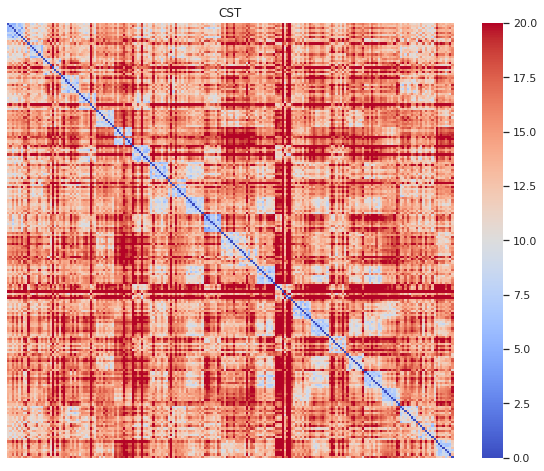

In [40]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==200
       ]
print(len(dist))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.title("CST")
plt.savefig('cst25subhm.svg')


In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==127
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist)
plt.savefig('cc16subhm.svg')

In [ ]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48
       ]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(25,20)})
dist = [i for i in dist_hm if len(i)==128]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
# plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(25,20)})
dist = [i for i in dist_hm if len(i)==152]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm")
# plt.savefig('cc16subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==48]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "coolwarm",yticklabels=False,xticklabels=False)
plt.savefig('cc6subhm.svg')

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==120]
print(len(dist_hm[10]))
import seaborn as sns
# rev_g = sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)
ax = sns.heatmap(dist,cmap = "icefire")

In [ ]:
sub_list = ['4936m', '1808u', '1043f', '0001a', '4662a', '1142k', '3992u', '2027j', '3978i', '3058s', '1145h', '4917f', '2211h', '4961a', '1665h', '3571z', '4680i', '3832y', '1853b', '0444g', '0097p', '2755j', '4558a', '2741x']
# li = set(del_list)
# print(li)
li =  [3,5,6,14,19,21,22]
sub_list = [sub_list[i] for i in range(25) if i not in li]
print(sub_list)
# 2,3,4,5,6,8,9,12
sub_list = [ '2027j', '3978i', '3058s', '1145h', '4917f', '4961a']

In [ ]:
sns.set(rc = {'figure.figsize':(10,8)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))

import seaborn as sns
# sns.color_palette("Blues", as_cmap=True)
ax = sns.heatmap(dist,cmap = "viridis")


In [ ]:
sns.set(rc = {'figure.figsize':(15,15)})
dist = [i for i in dist_hm if len(i)==200]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
sns.set(rc = {'figure.figsize':(8,8)})
dist = [i for i in dist_hm[:6] if len(i)==88]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
#importance of node score
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score/len(gref.nodes()) # throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 10
dist_hm = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subi])+"_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H1, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H1, node_loc)
                        annotate_graph(H1, node_loc)
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subj])+"_ses-"+str(j)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H2, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H2, node_loc)
                        annotate_graph(H2, node_loc)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn)
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        dist_sub.append(dist)
                        print(subi,i,subj,j,dist)
                    except:
                        pass
            dist_hm.append(dist_sub)

    

    

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist,cmap = "coolwarm")

In [ ]:
#importance of node score
def my_scoring_fn(node_score, edge_weight_score, edge_dist_score, gcmp, gref, eps, delta, tau):
    return node_score # throw away everything else
#     return edge_dist_score/len(gref.edges())

# D = distance(gcmp, gref, eps, delta, tau, scoring_func=my_scoring_fn)
eps =2.5
delta = 3
tau = 10
dist_hm = []
for subi in range(len(sub_list)):
    for i in range(1,10):
            dist_sub = []
            for subj in range(len(sub_list)):
                for j in range(1,10): 
                    try:                        
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subi])+"_ses-"+str(i)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H1, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H1, node_loc)
                        annotate_graph(H1, node_loc)
                        trkpathI = "/media/hdd2/shailja/Crash/sphere1brush6/sub-"+str(sub_list[subj])+"_ses-"+str(j)+"_DSI_mc.src.gz.odf8.f5rec.gqi.1.25.cc.trk.gz"    
                        p_streamlines =  nib.streamlines.load(trkpathI)
                        streamlines = p_streamlines.streamlines
                        H2, node_loc,cluster_edge = rc.constructRobustReeb(streamlines, eps, delta, tau)
                        merge_equivalent(H2, node_loc)
                        annotate_graph(H2, node_loc)
                        #dist = partial(sn.distance, eq_rad=eps, scoring_func=sn.max_cost_score)
                        dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=my_scoring_fn)
                        #dist = partial(sn.distance, eps=eps, delta=delta, tau=tau, scoring_func=sn.max_cost_score)
                        dist = 0.5*(dist(H1, H2) + dist(H2, H1))
                        dist_sub.append(dist)
                        print(subi,i,subj,j,dist)
                    except:
                        pass
            dist_hm.append(dist_sub)

In [ ]:
dist = [i for i in dist_hm if len(i)==23]
print(len(dist_hm[10]))
import seaborn as sns
ax = sns.heatmap(dist)